In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_submission = pd.read_csv("./sample_submission.csv")
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Latihan: Data Cleaning dan Transformation

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Analisis Deskriptif

In [7]:
# menampilkan statistik deskriptif
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## Mencari Nilai yang Hilang

In [8]:
# memeriksa jumlah nilai yang hilang di setiap kolom
missing_value = train.isnull().sum()
missing_value[missing_value > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Mengatasi Missing Value

Pertama-tama, mari kita pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%.

In [9]:
less = missing_value[missing_value < 1000].index
over = missing_value[missing_value >= 1000].index

In [10]:
less

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [11]:
over

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Mari kita mulai dengan mengatasi missing value untuk tipe data numerik.

In [12]:
numeric_feature = train[less].select_dtypes(include=["number"]).columns
train[numeric_feature] = train[numeric_feature].fillna(train[numeric_feature].median())

Secara singkat kode di atas memiliki dua fungsi utama yaitu sebagai berikut.

1. Baris pertama memilih nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.

2. Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom. kenapa median ? karna median lebih tahan banting ama outliers

Selanjutnya, kita perlu menangani permasalahan yang serupa pada data yang bertipe object atau string. Sedikit berbeda dengan kasus data numerik, pada kasus ini kita tidak bisa menggunakan median, mean, atau fungsi agregasi lainnya. Biasanya ada dua cara yang sering dilakukan untuk mengatasi permasalahan missing value pada data kategori.

1. Mengisi Missing Value dengan Modus (Nilai yang Paling Sering Muncul): pendekatan ini cukup umum karena nilai modus sering kali merupakan representasi yang baik untuk data yang hilang dalam konteks kategorikal.
2. Mengisi dengan Kategori Baru (Misalnya "Unknown" atau "Missing"): ini adalah cara lain untuk menangani missing value dengan menandai data yang hilang sebagai kategori baru.

In [13]:
kategorical_feature = train[less].select_dtypes(include=["object"]).columns

for column in kategorical_feature:
    train[column] = train[column].fillna(train[column].mode()[0])

Kode di atas akan melakukan pengulangan pada setiap kolom yang berisi data kategori dalam DataFrame train. Selanjutnya, setiap kolom kategori akan melakukan proses pergantian untuk semua nilai yang hilang (NaN) dengan nilai modus dari kolom tersebut. Hasil akhirnya adalah semua kolom kategori dalam DataFrame train tidak lagi memiliki nilai yang hilang (NaN) karena semua NaN telah diisi dengan nilai modus dari kolom masing-masing.

```python
train[column].fillna(train[column].mode()[0])
```

Artinya:

Mengisi nilai NaN di kolom tertentu dengan modus (nilai yang paling sering muncul) pada kolom tersebut.

Kalau ada lebih dari satu modus, hanya dipakai modus pertama ([0]).


#### Menghapus Kolom dengan Banyak Nilai yang Hilang:jika ada kolom dengan terlalu banyak nilai yang hilang, kita bisa mempertimbangkan untuk menghapusnya (pada kasus ini kita mengambil batasan 75%). Untuk mengatasi kasus ini sangatlah mudah, pertama Anda perlu mengambil index atau nama kolom dari fitur yang memiliki missing value lebih dari batasan yang sudah ditentukan (Anda dapat lihat kode ketika memisahkan kolom di atas). Kemudian hal yang perlu dilakukan adalah menghapus kolom tersebut sesuai dengan nama fitur yang sudah ditentukan sebelumnya

In [14]:
df = train.drop(columns=over)

In [15]:
missing_value = df.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

### Mengatasi Outliers

Salah satu cara mengatasi outliers adalah dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan yang efektif. IQR adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam data. Nilai yang terletak di luar batas IQR dianggap sebagai outlier.

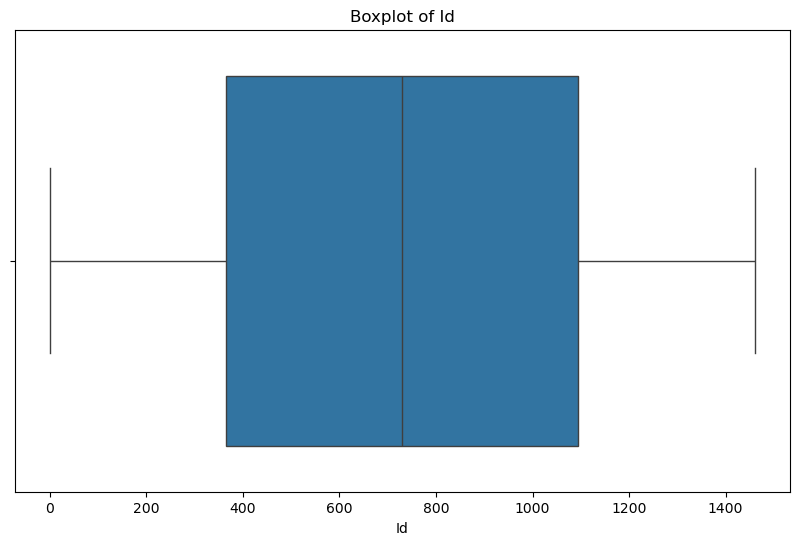

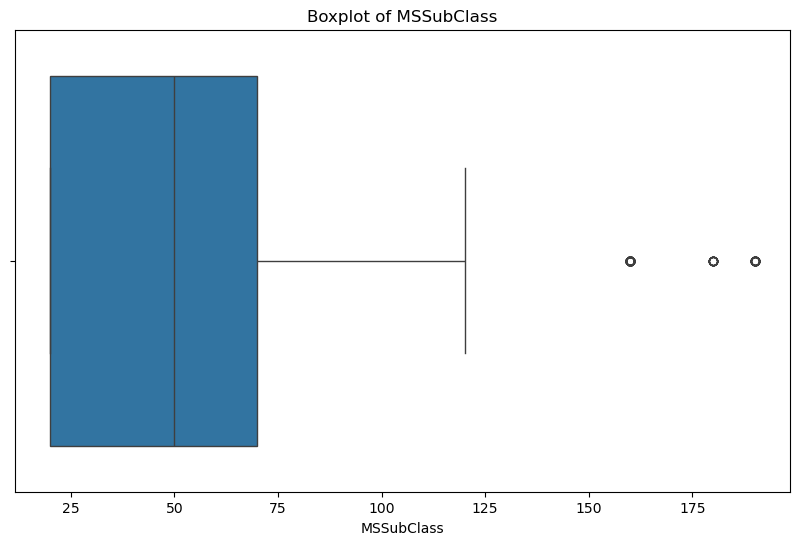

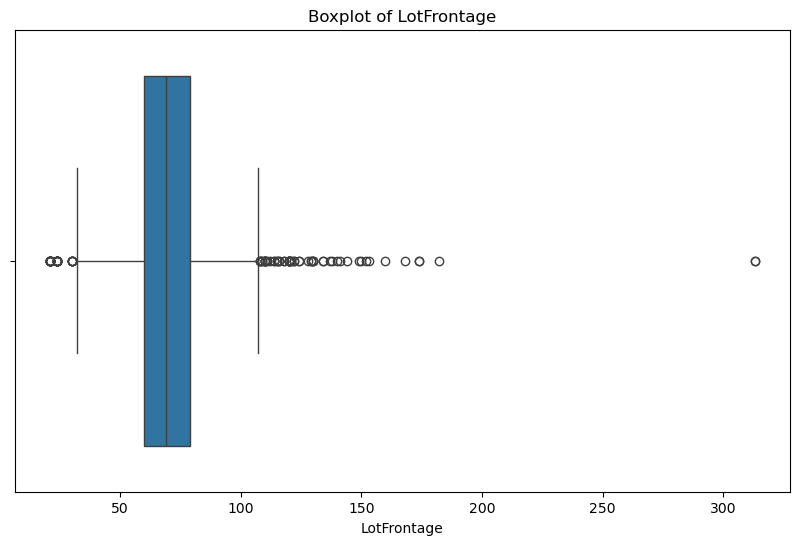

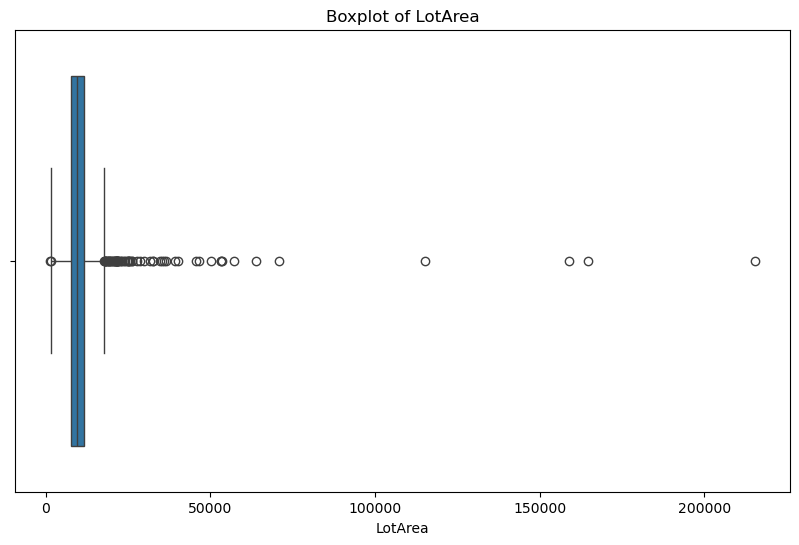

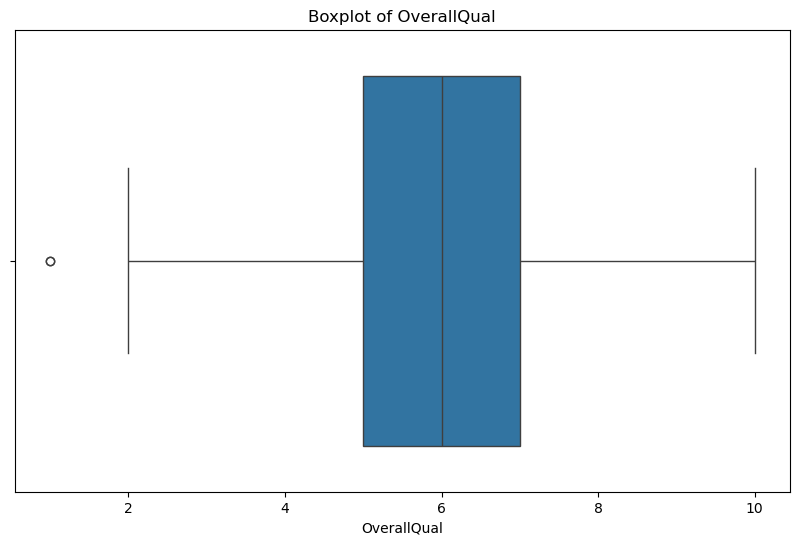

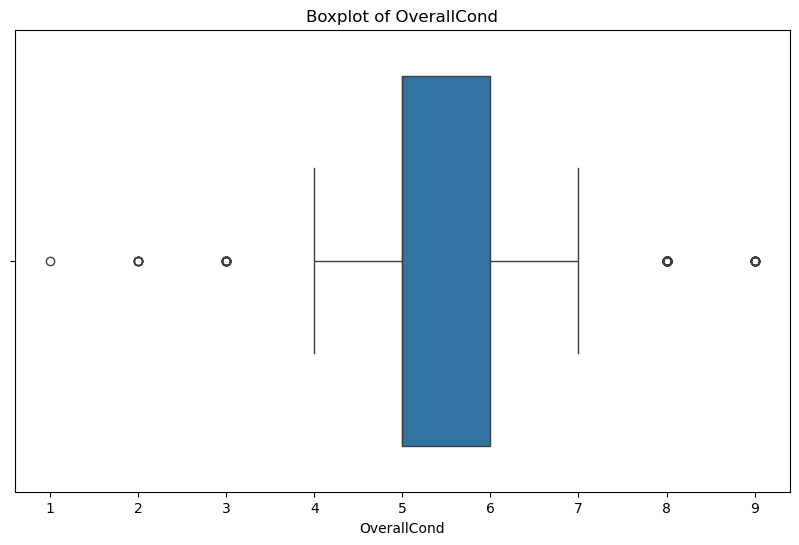

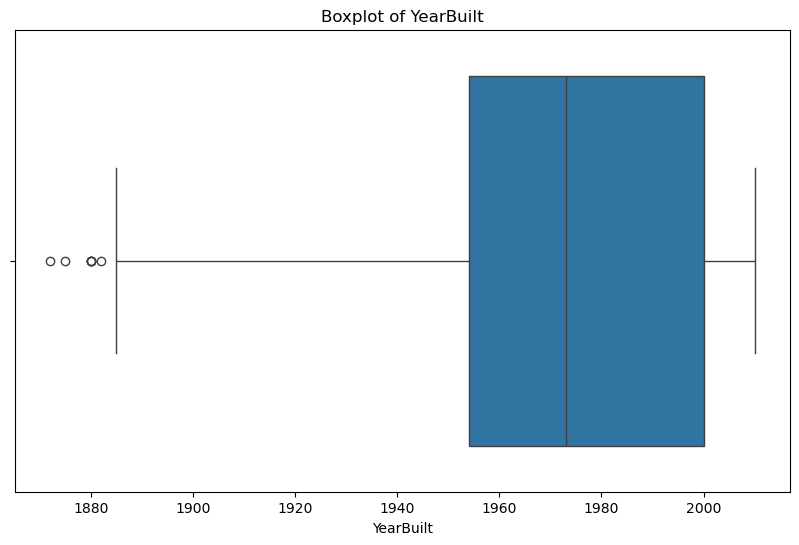

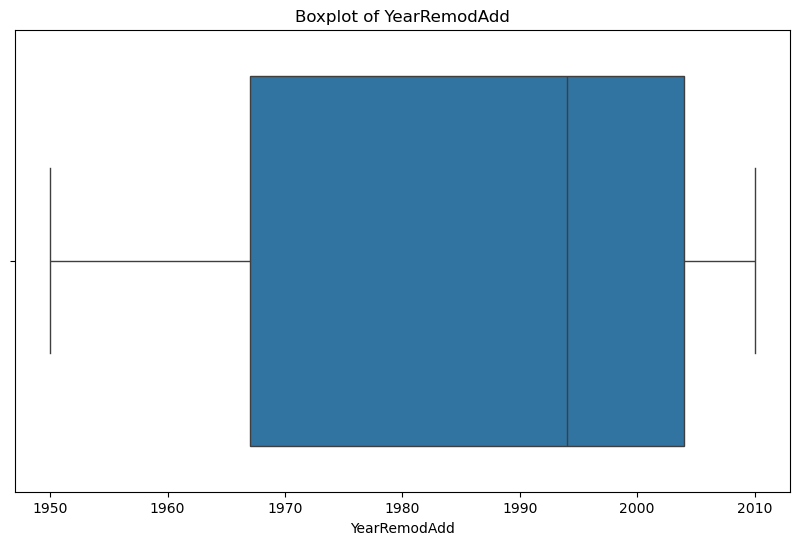

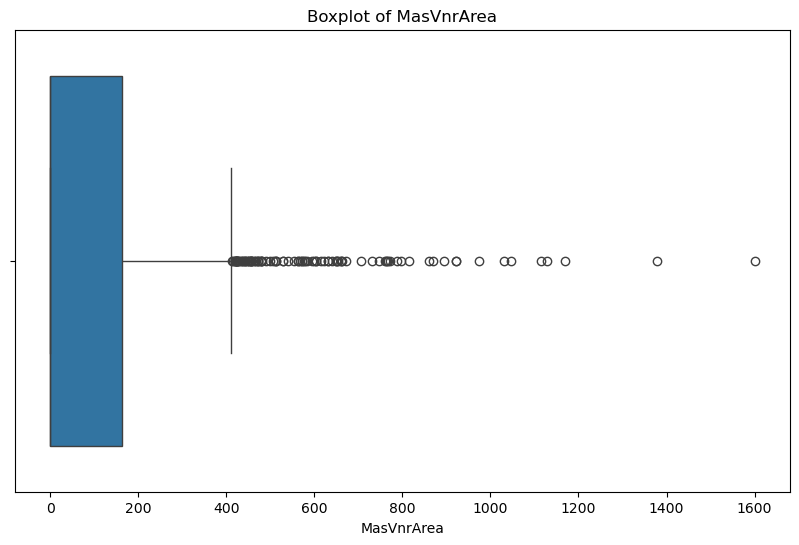

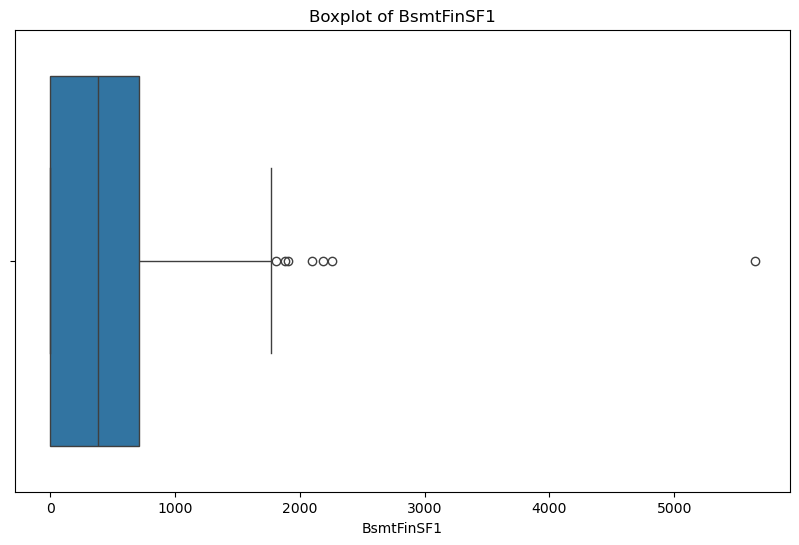

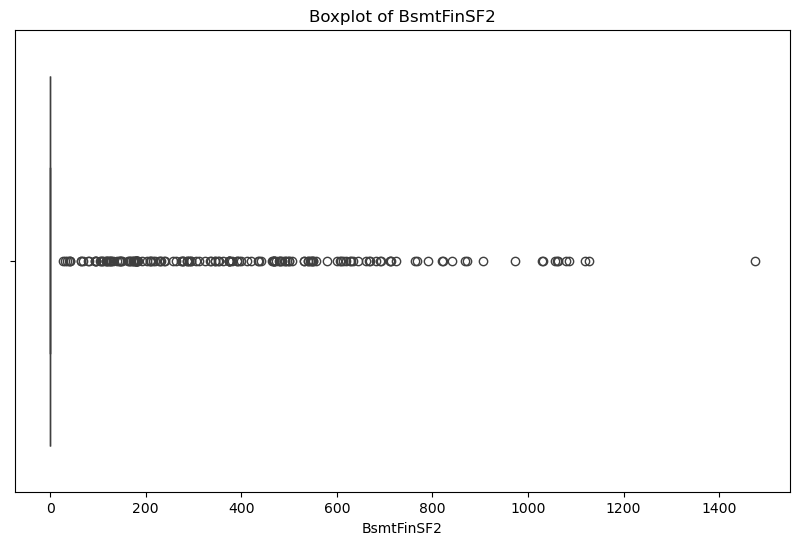

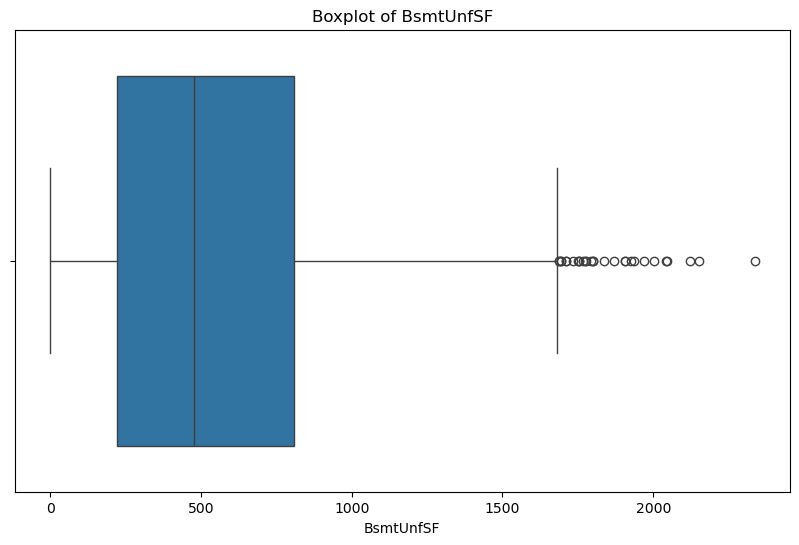

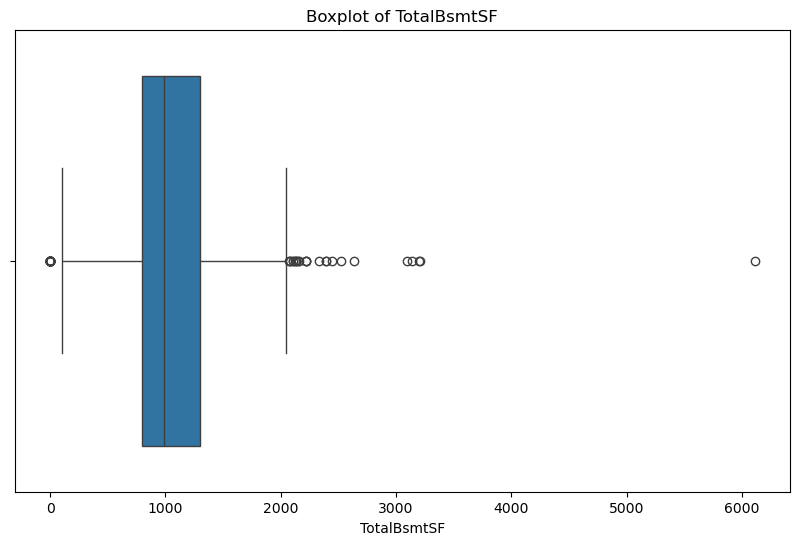

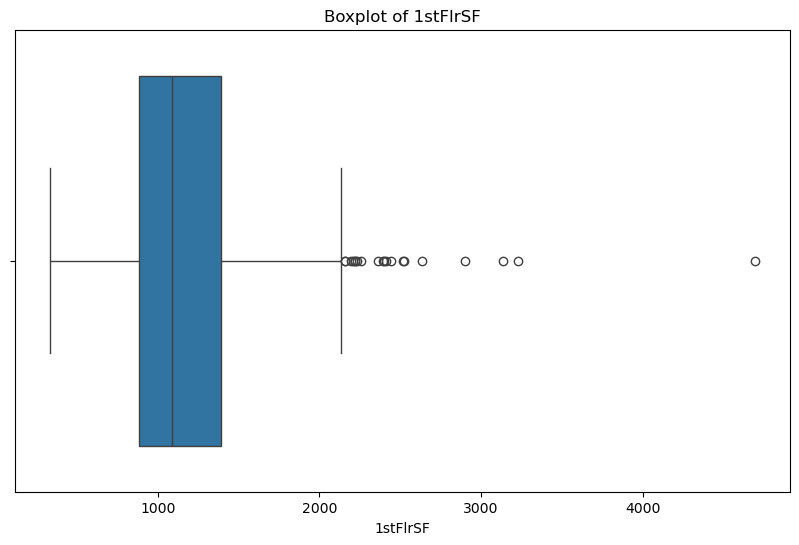

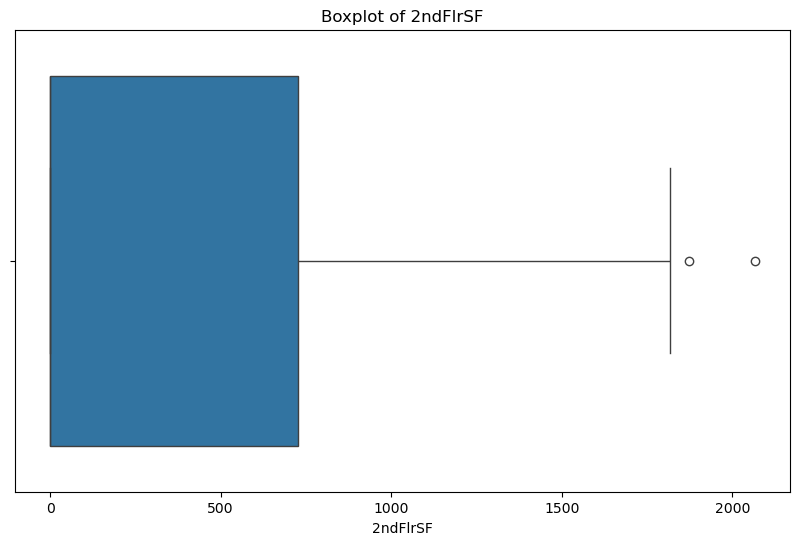

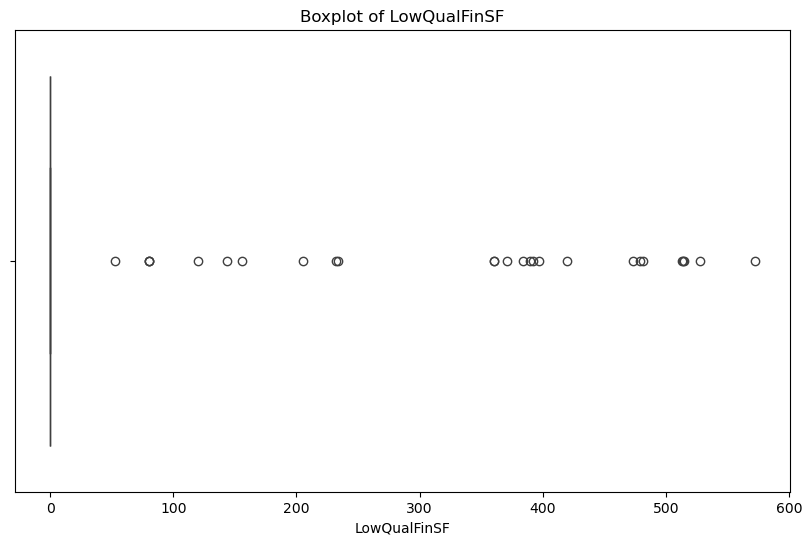

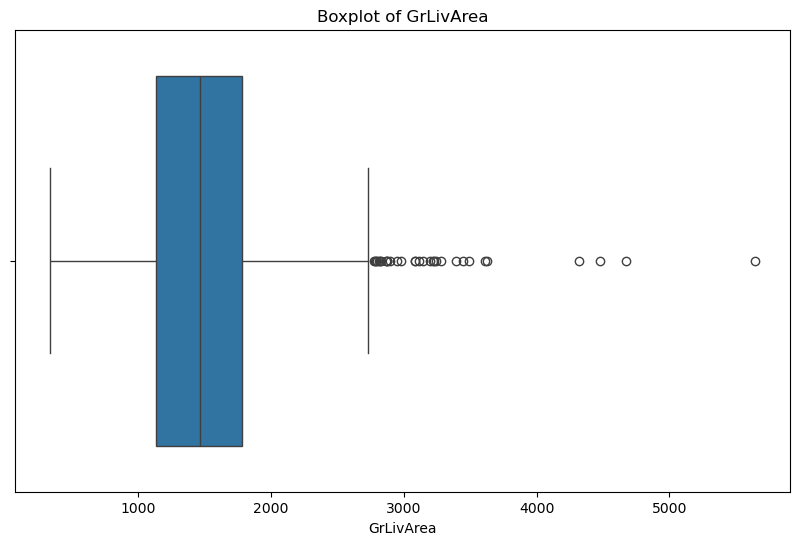

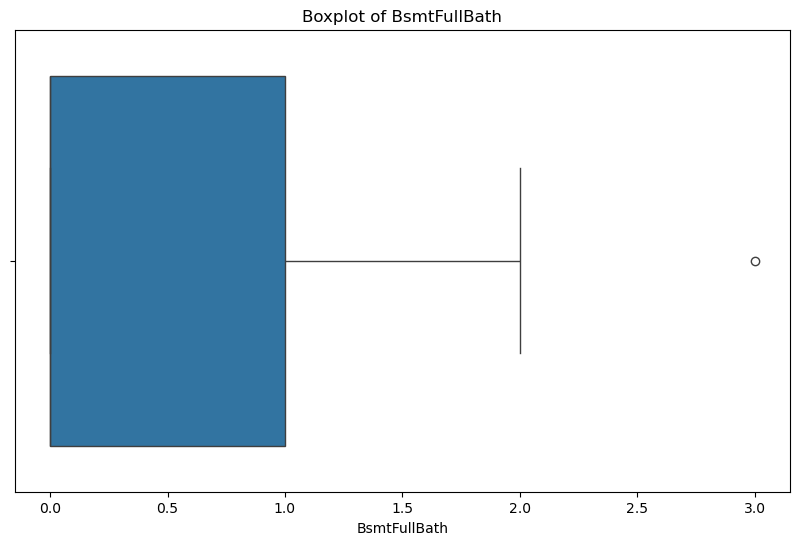

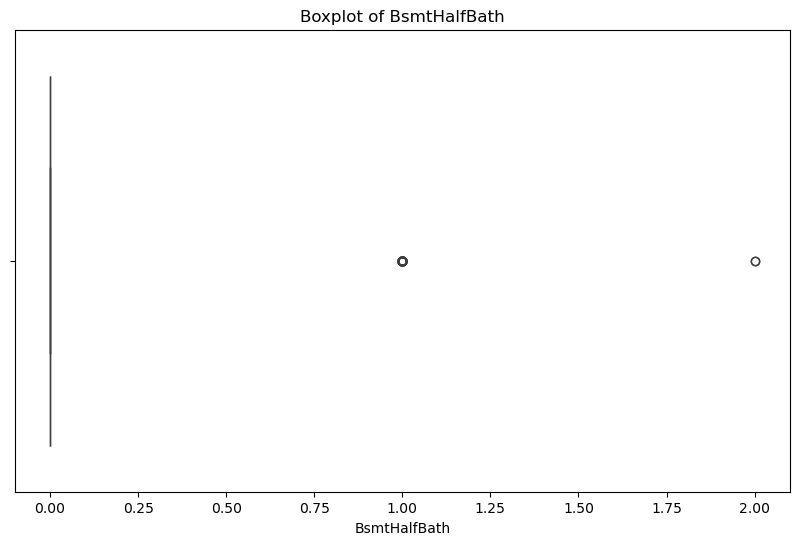

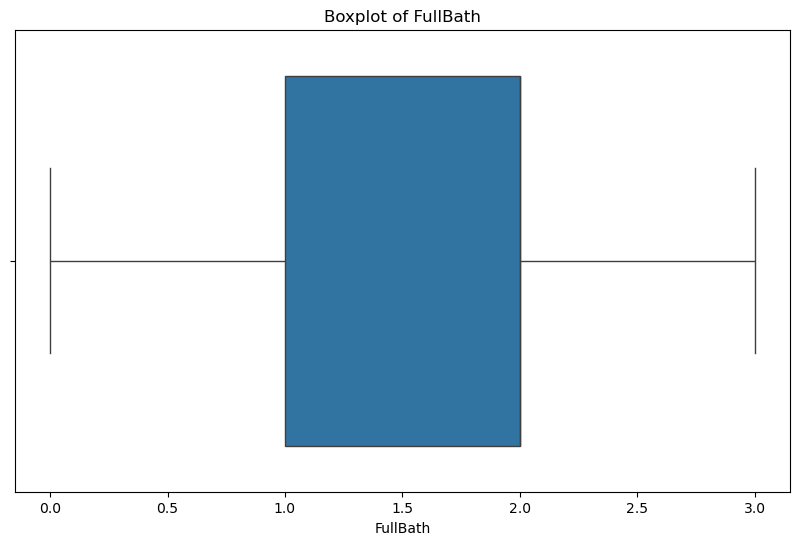

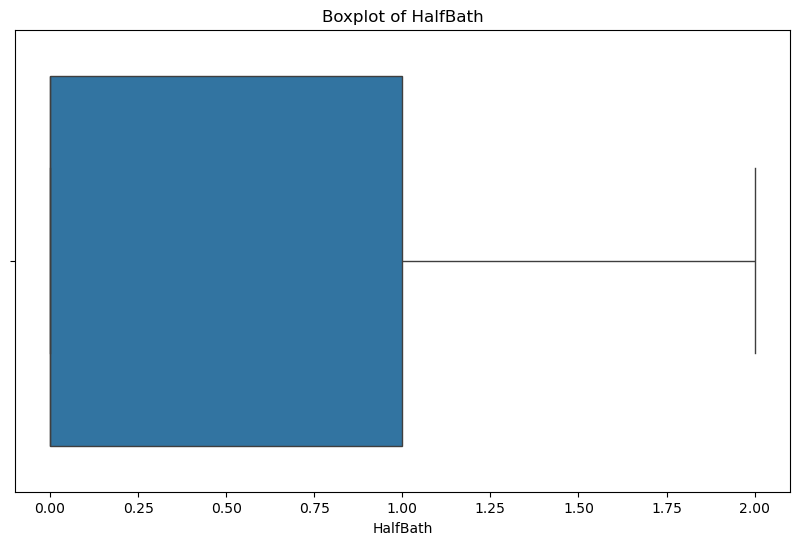

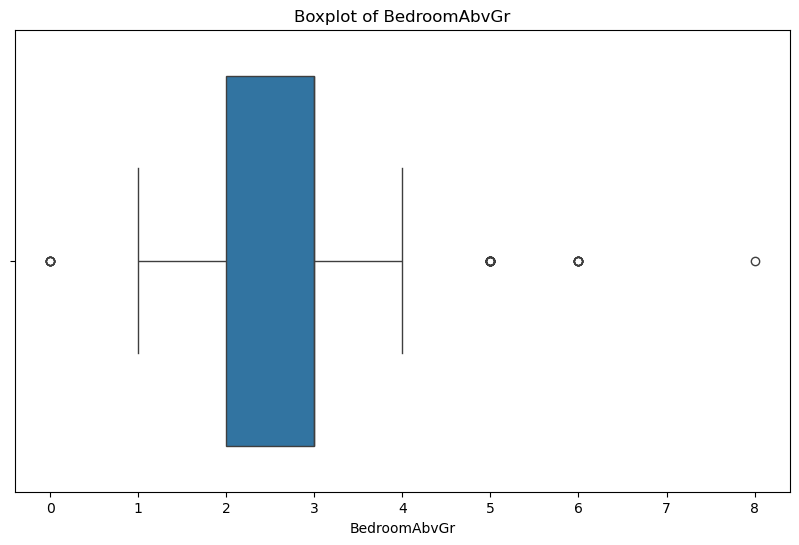

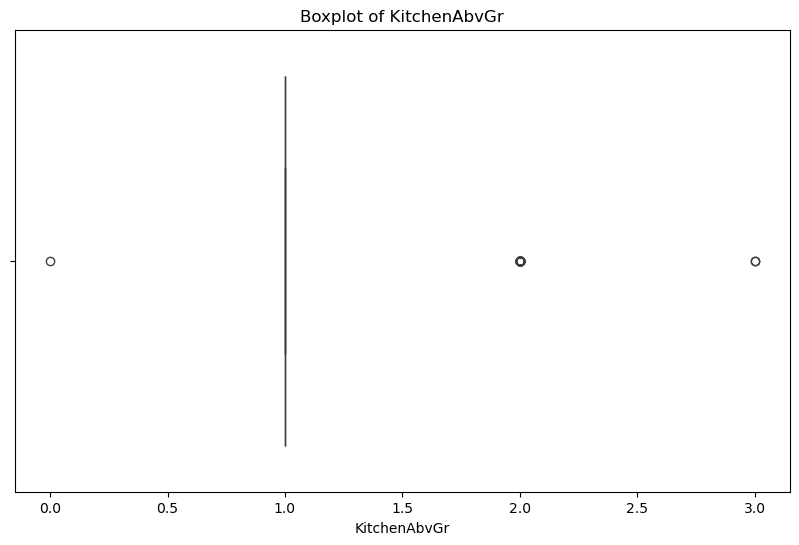

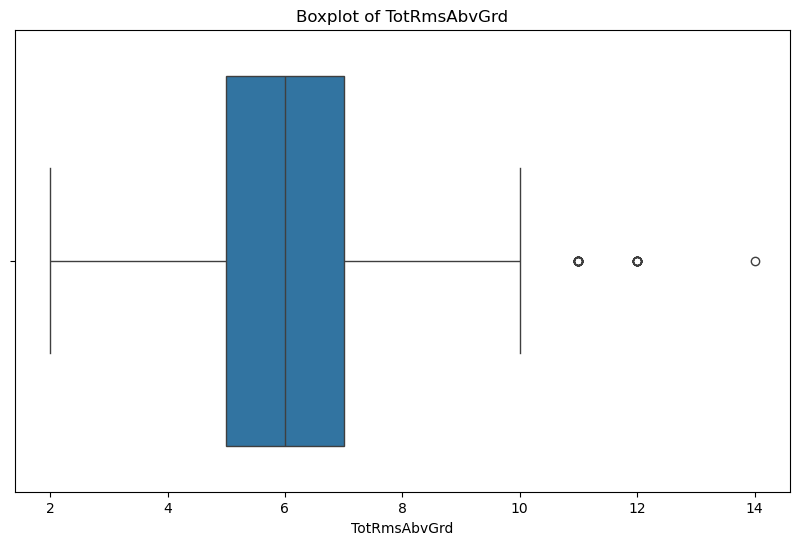

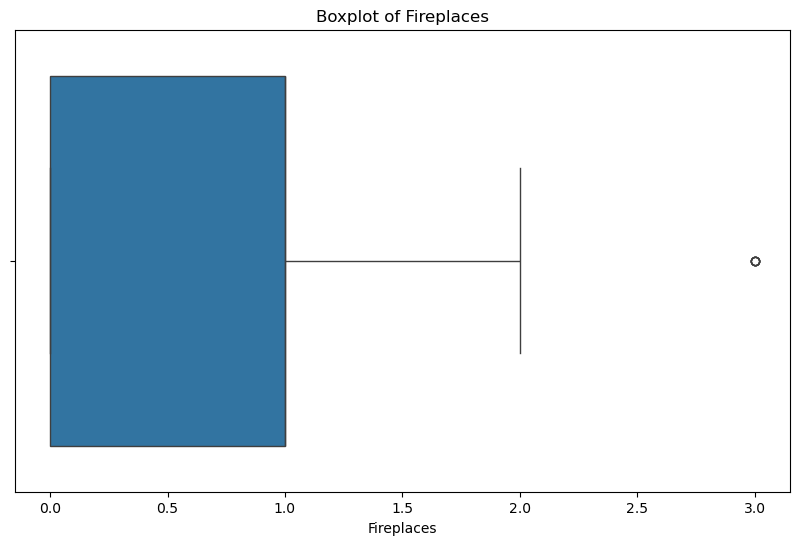

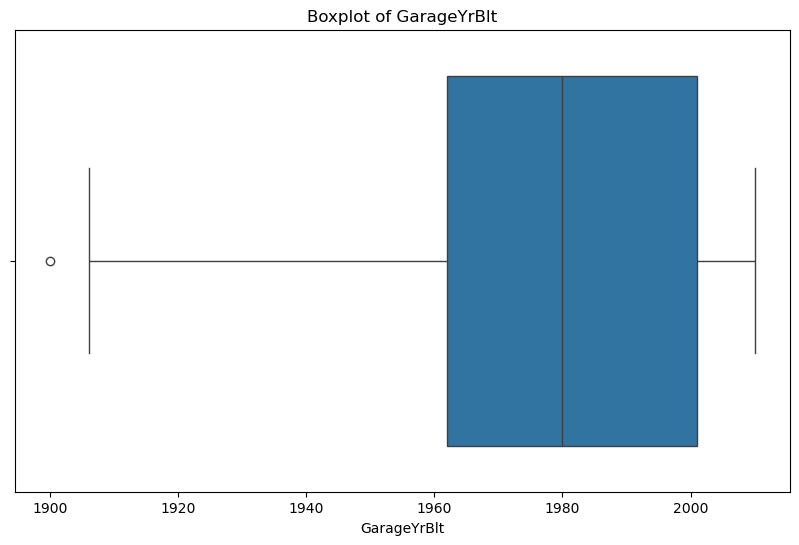

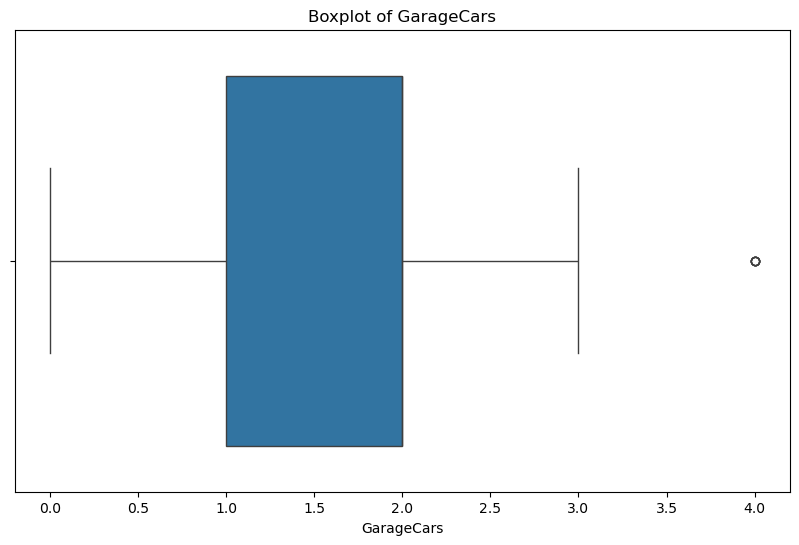

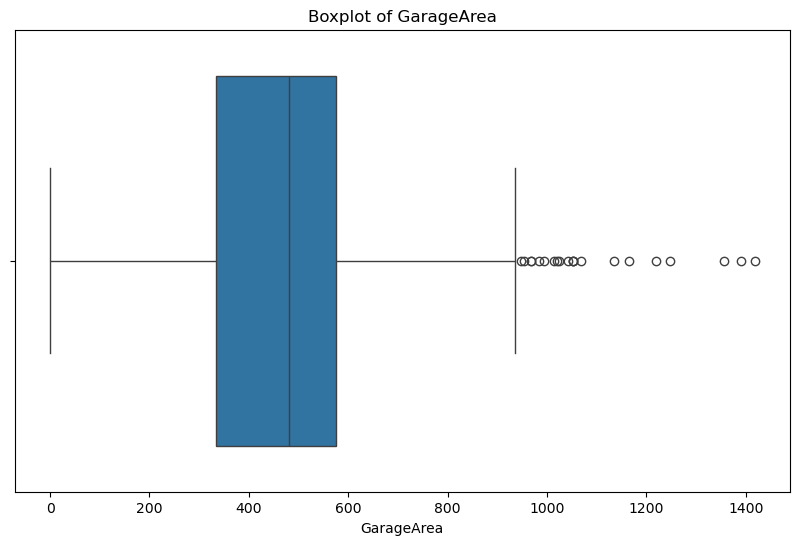

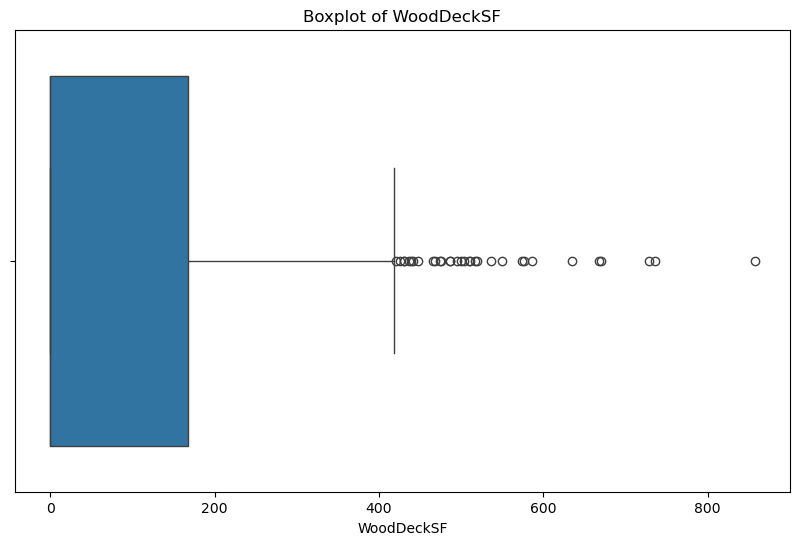

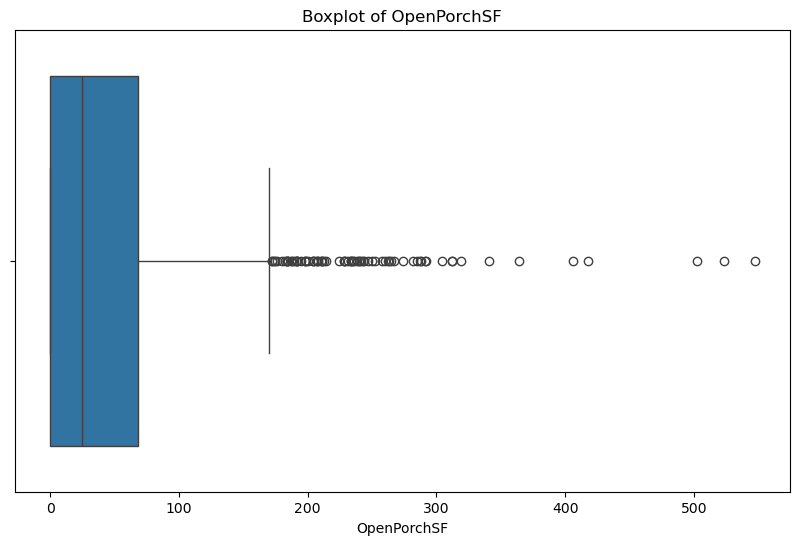

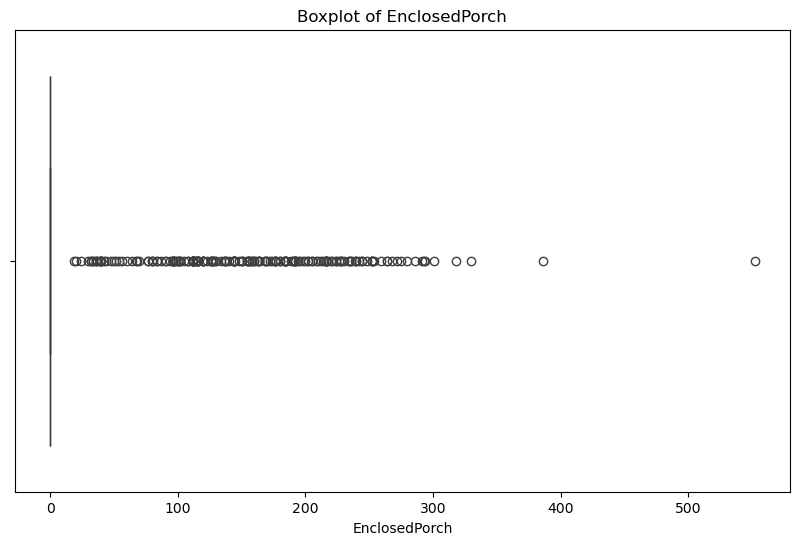

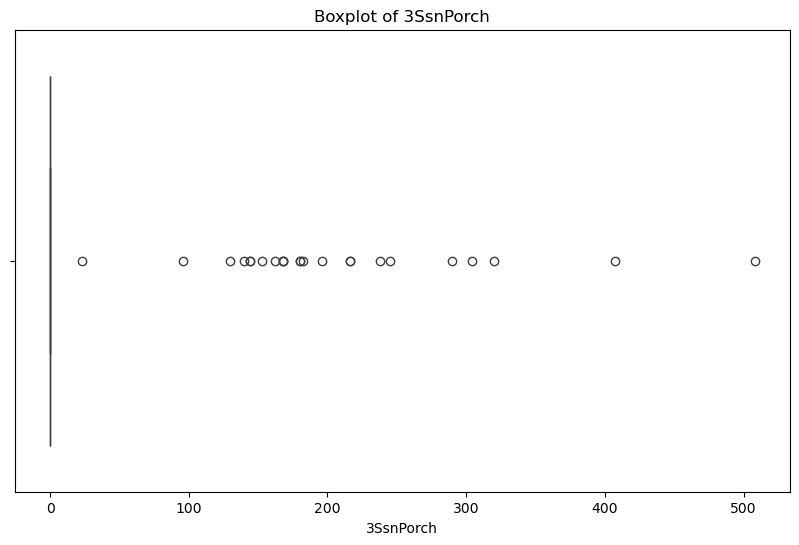

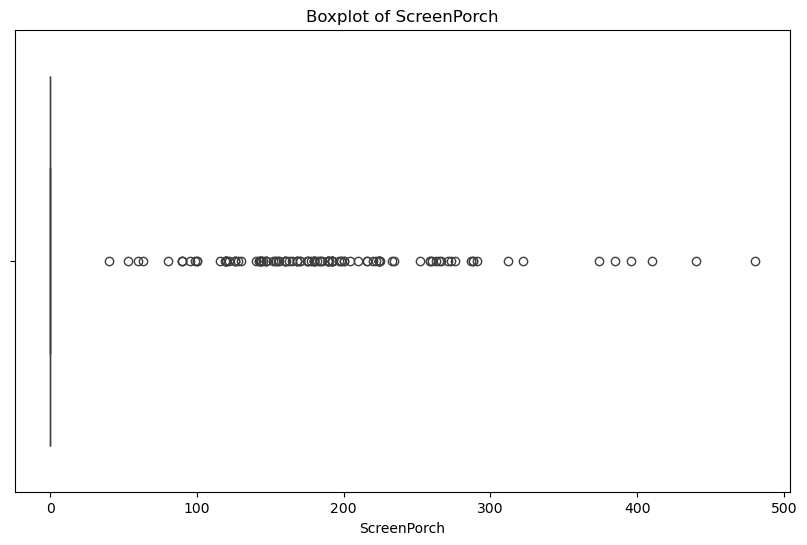

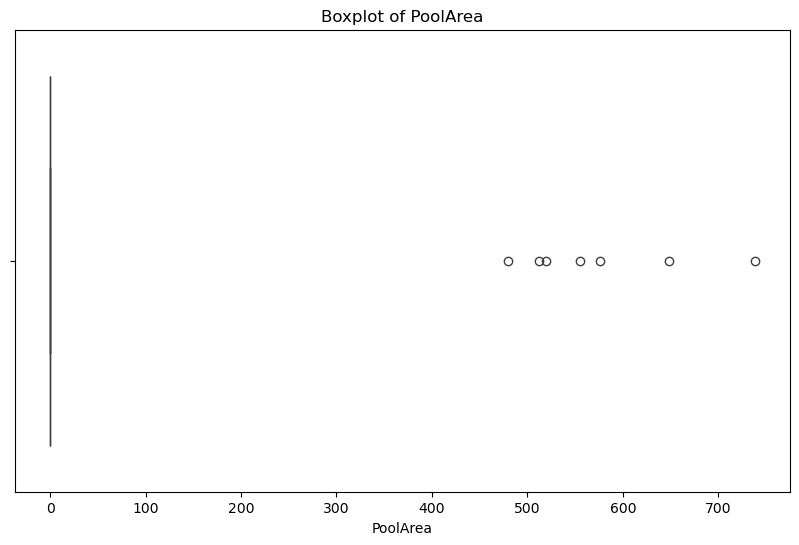

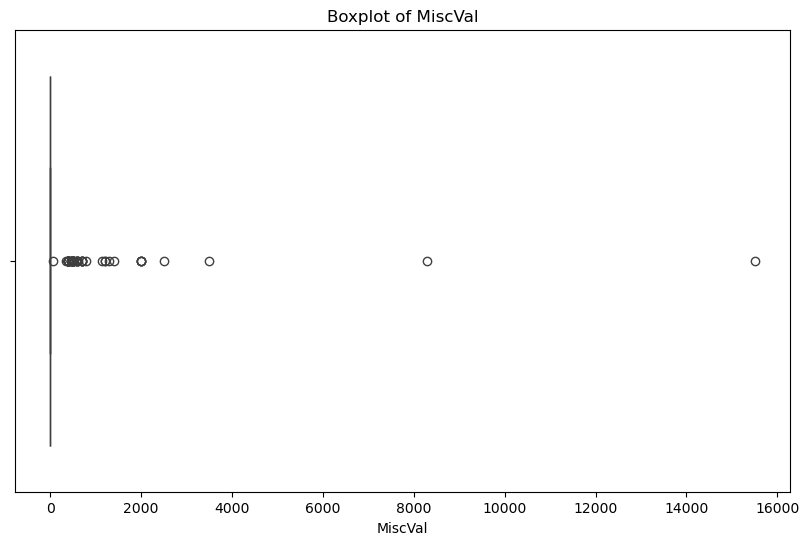

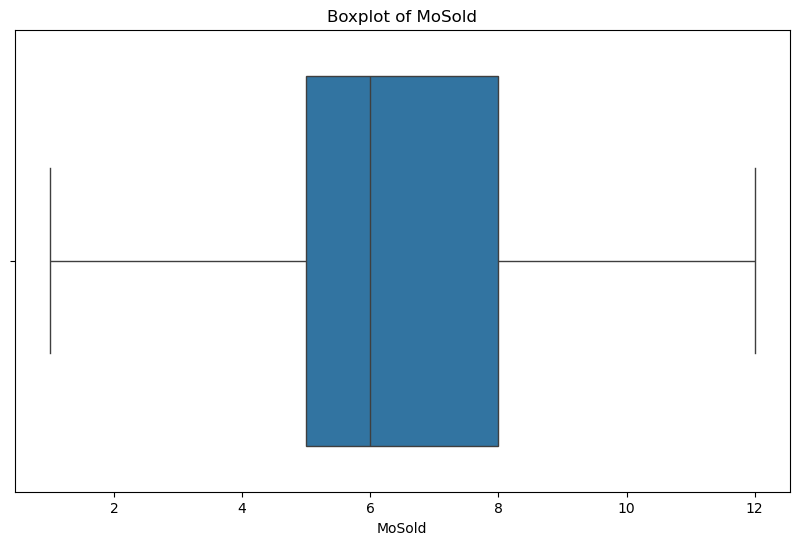

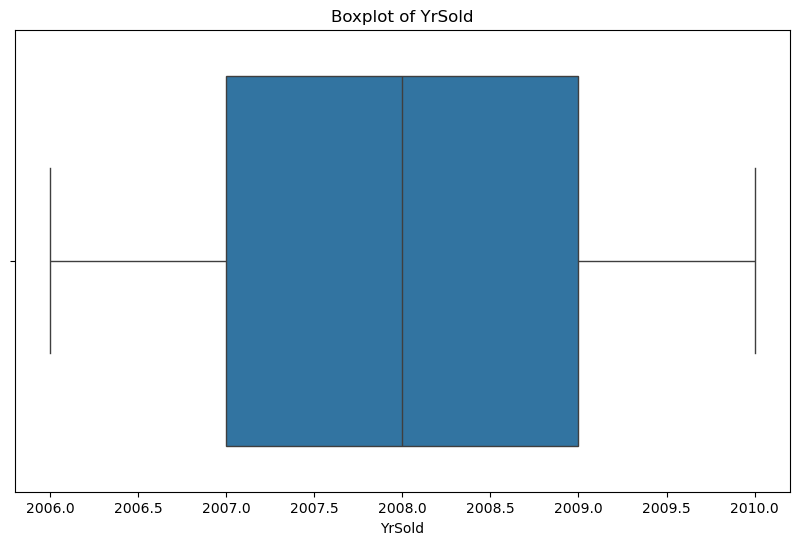

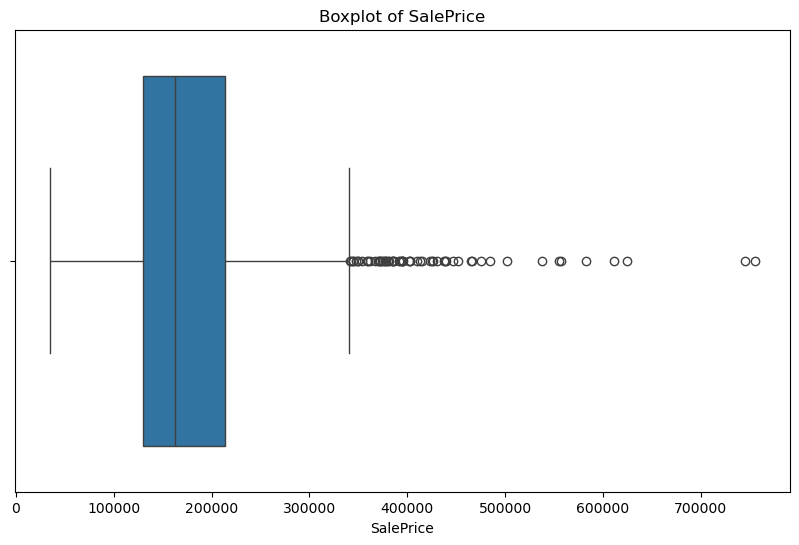

In [16]:
for feature in numeric_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x=df[feature]
    )
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [17]:
# contoh sederhana untuk mengedintifikasi outliers menggunakan IQR
Q1 = df[numeric_feature].quantile(0.25)
Q3 = df[numeric_feature].quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_feature] <= (Q1 - 1.5 * IQR)) | (df[numeric_feature] >= (Q3 + 1.5 * IQR))).all(axis=1)

df_filtered_numeric = df.loc[condition, numeric_feature]

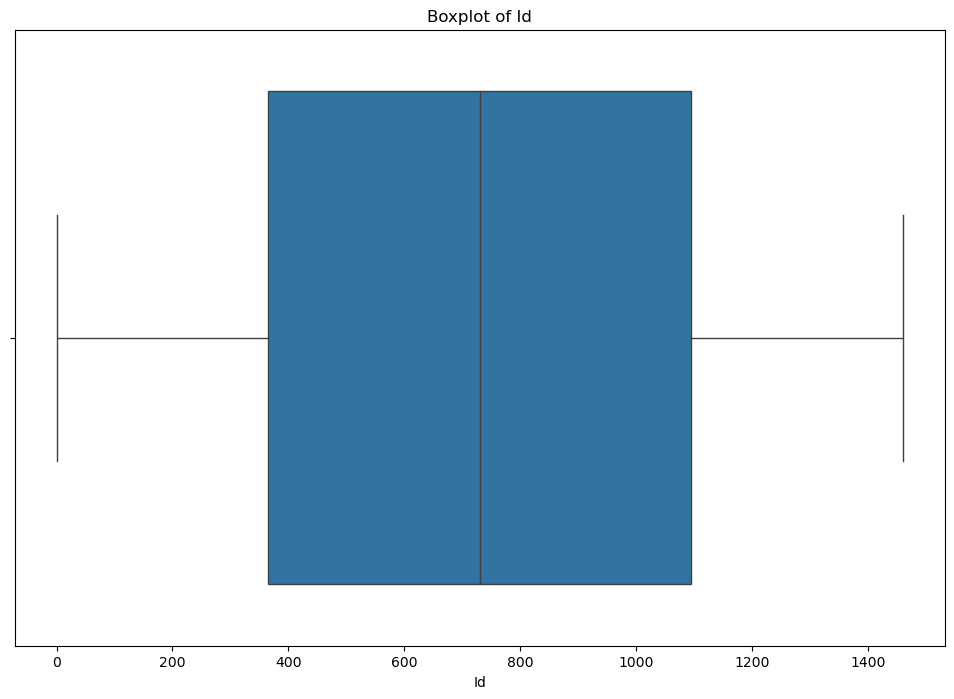

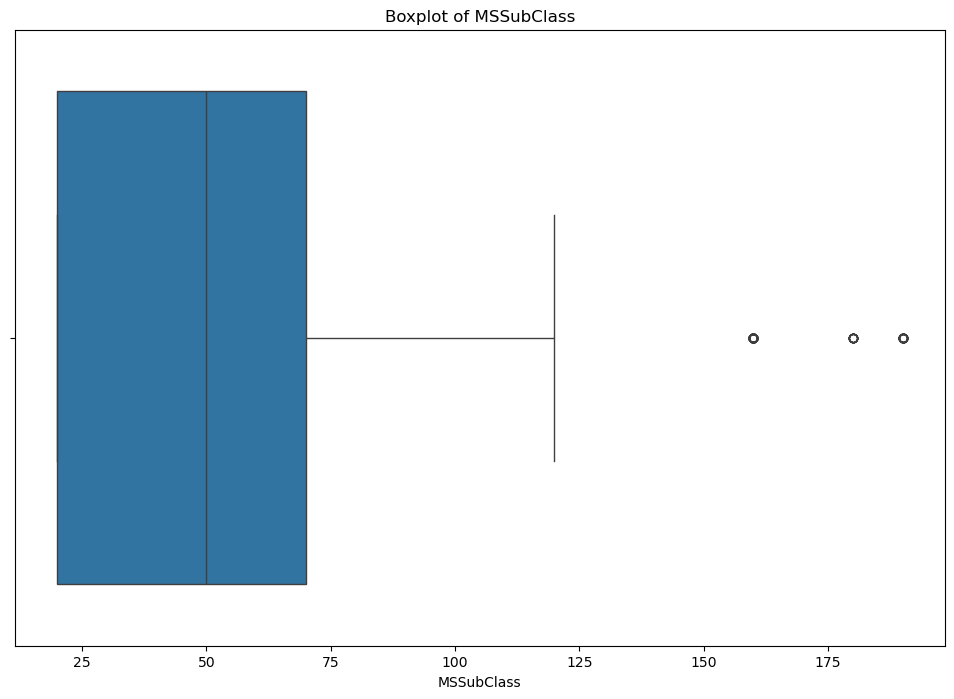

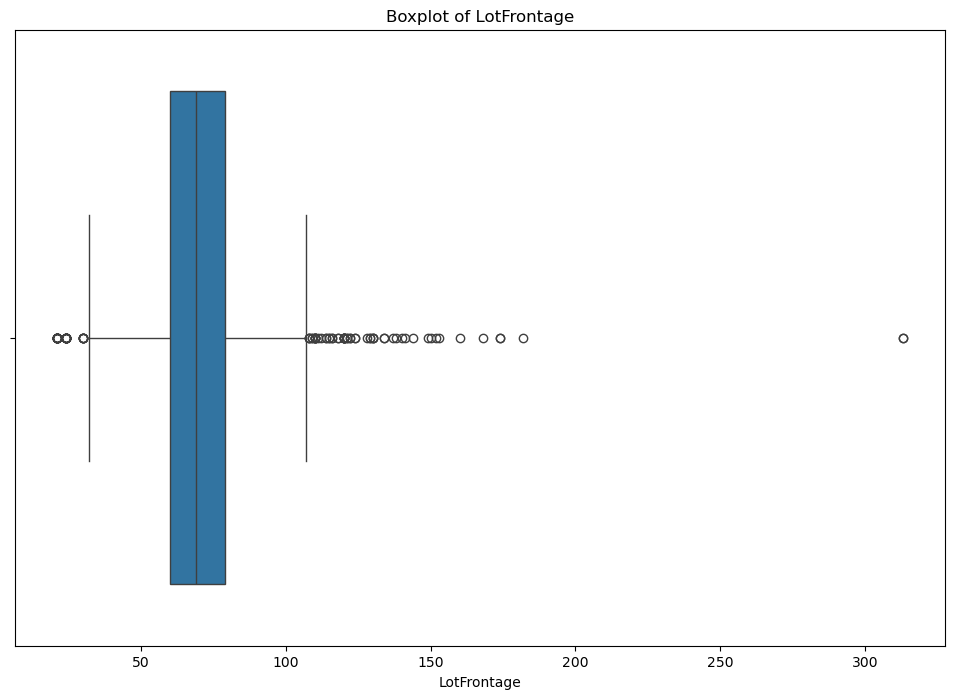

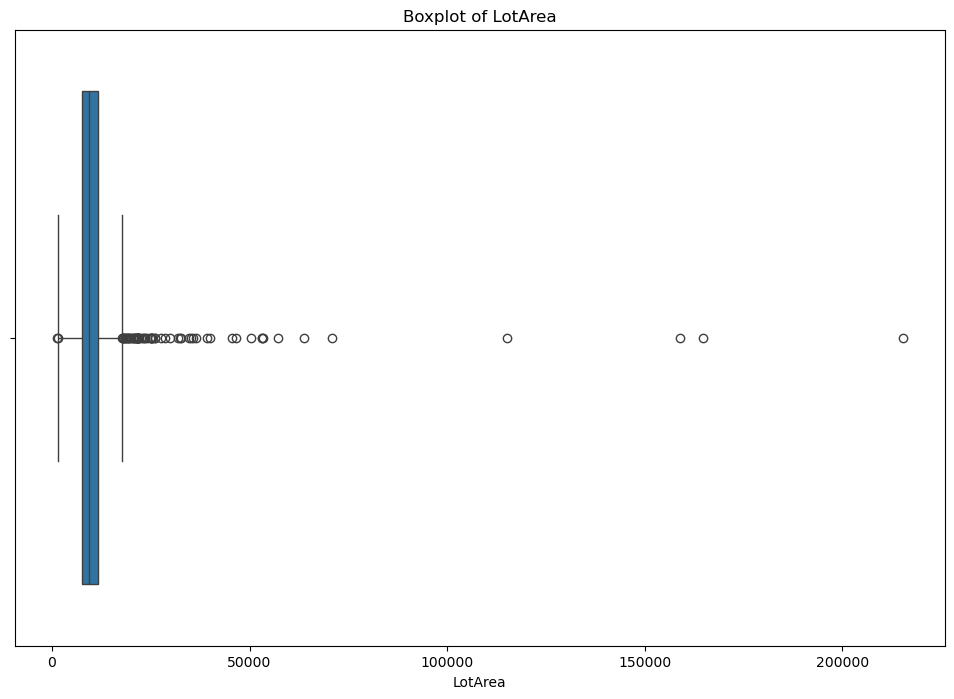

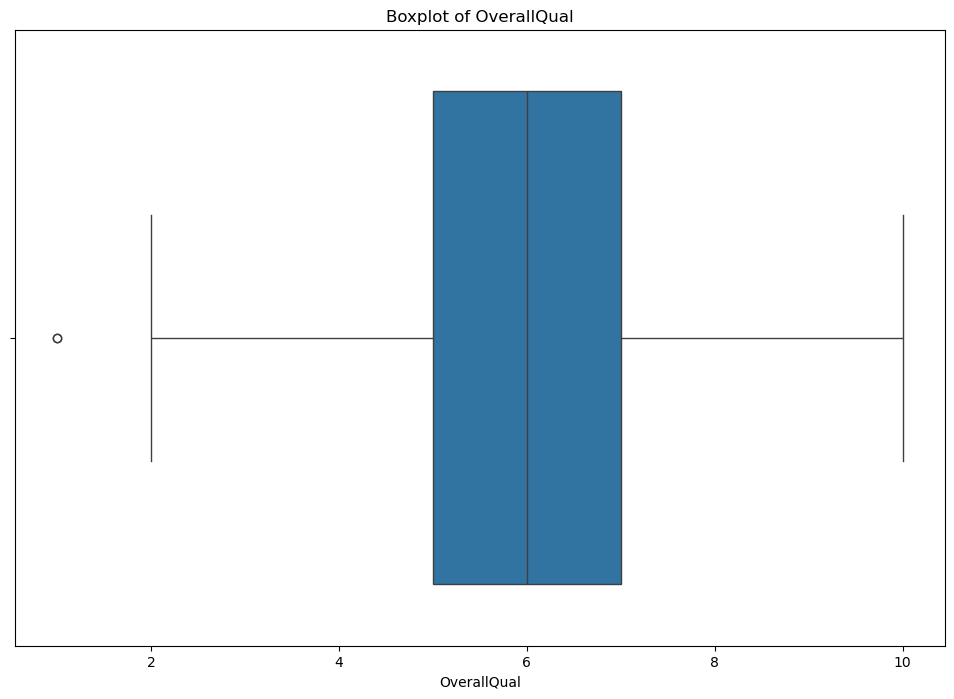

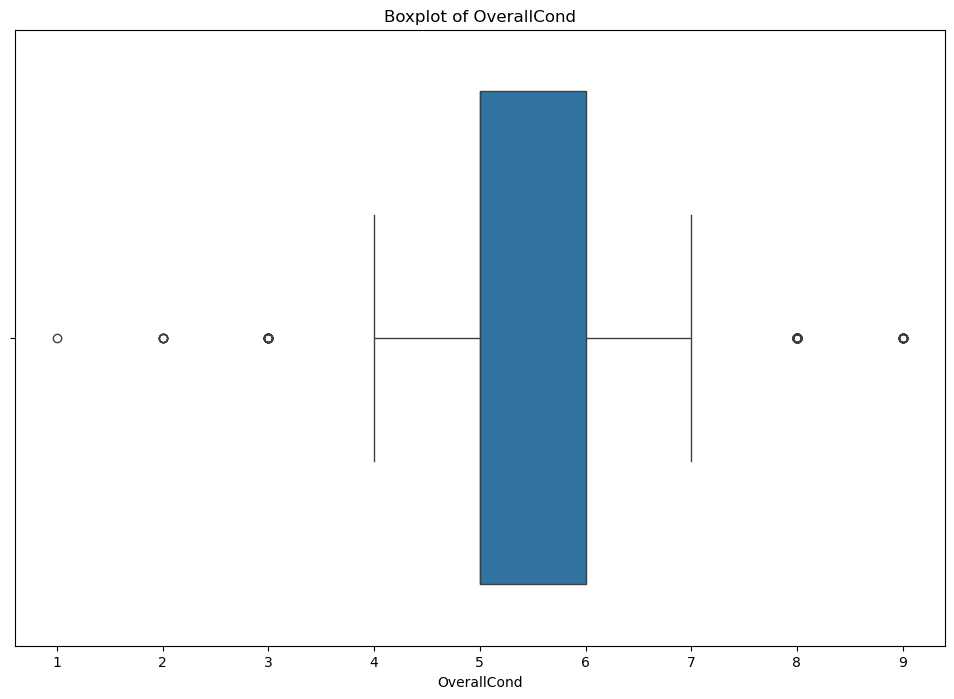

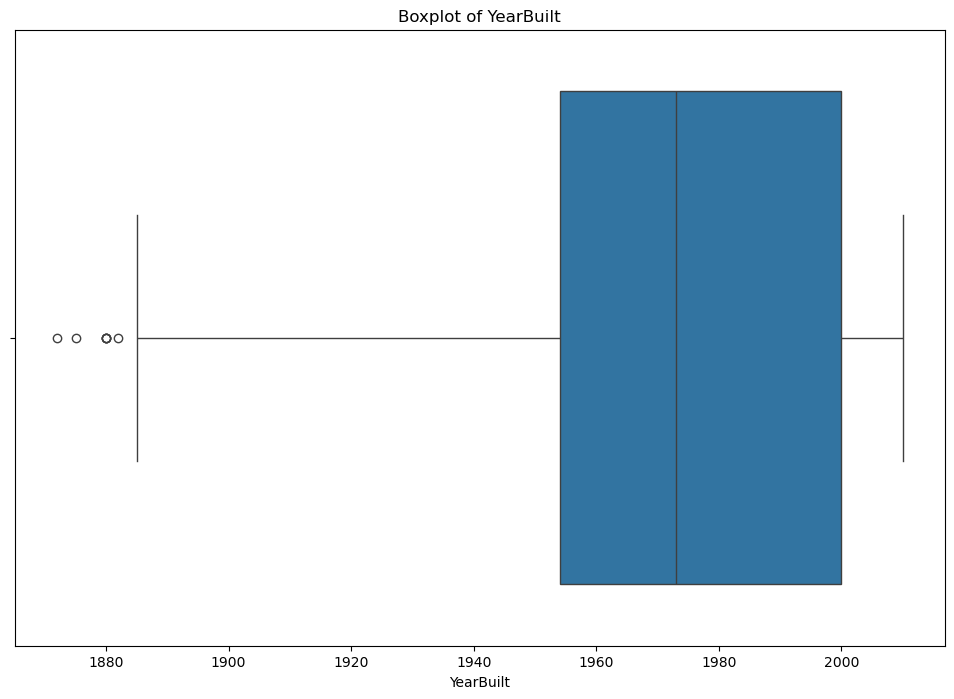

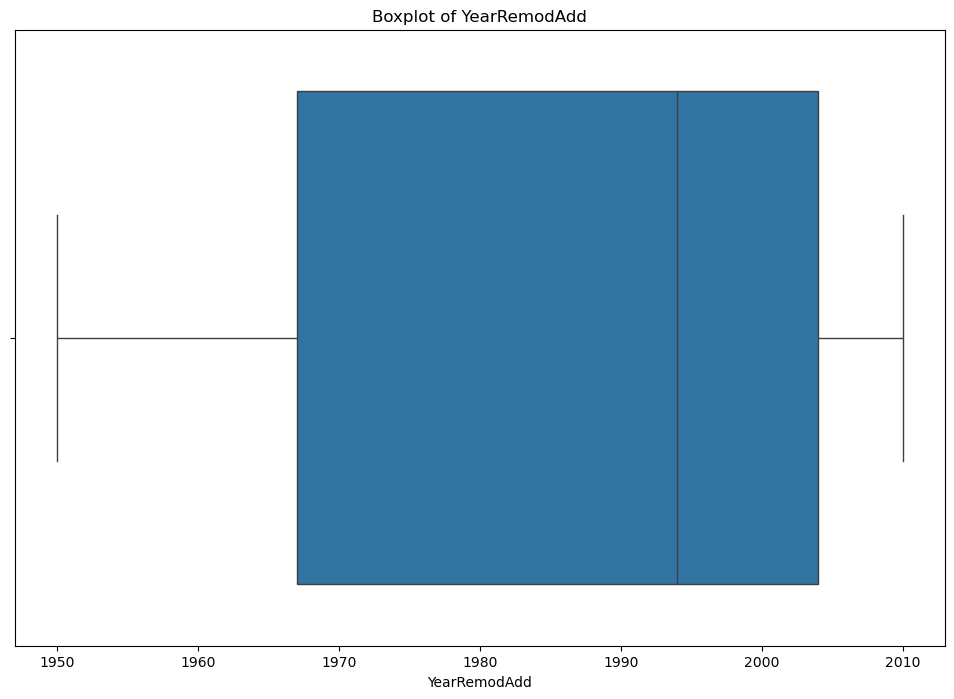

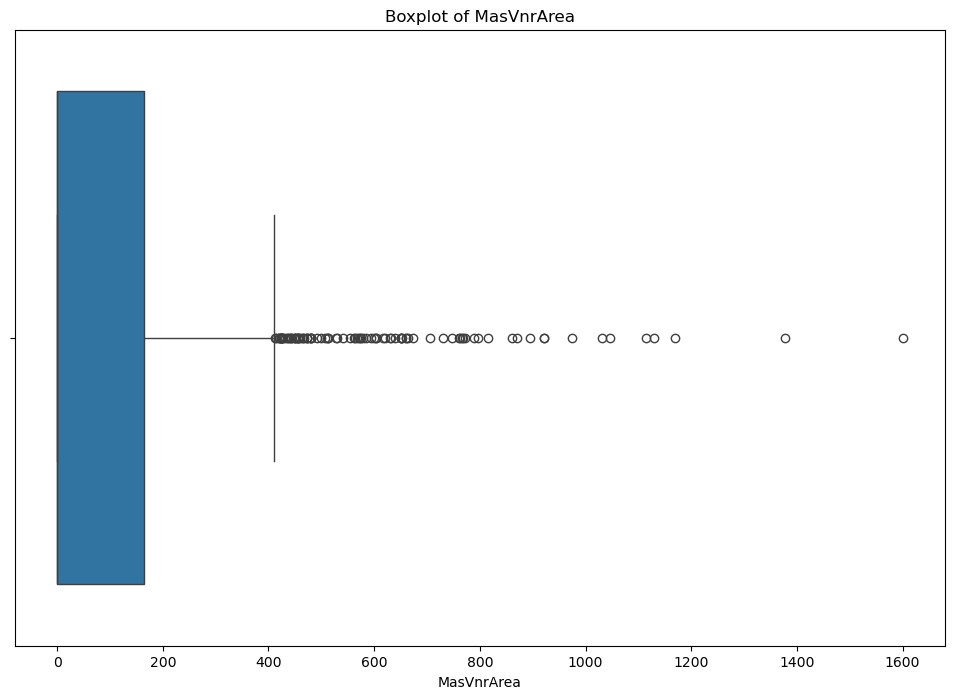

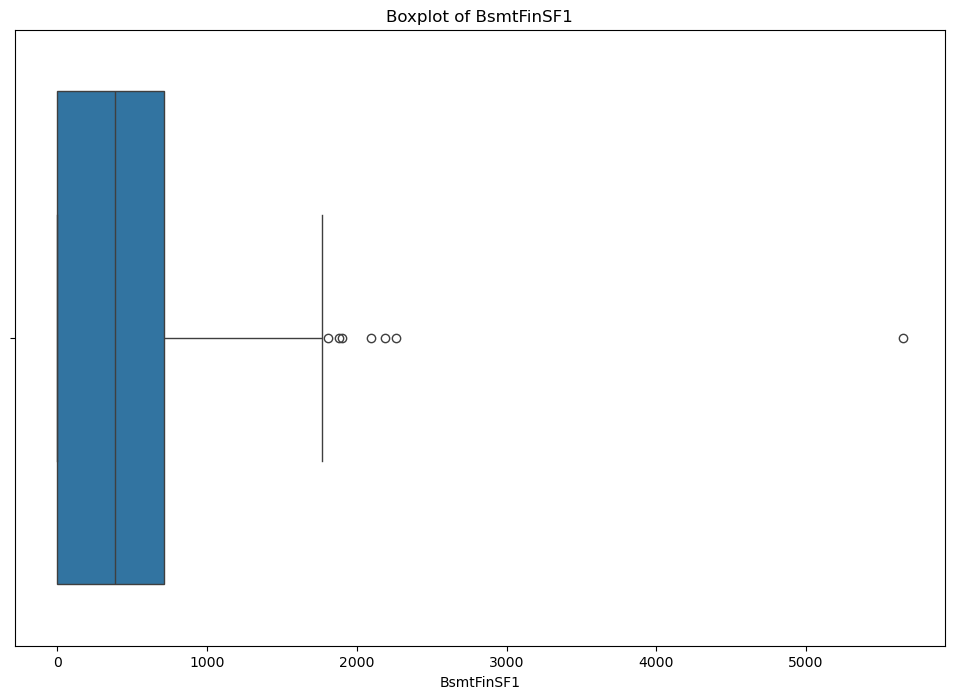

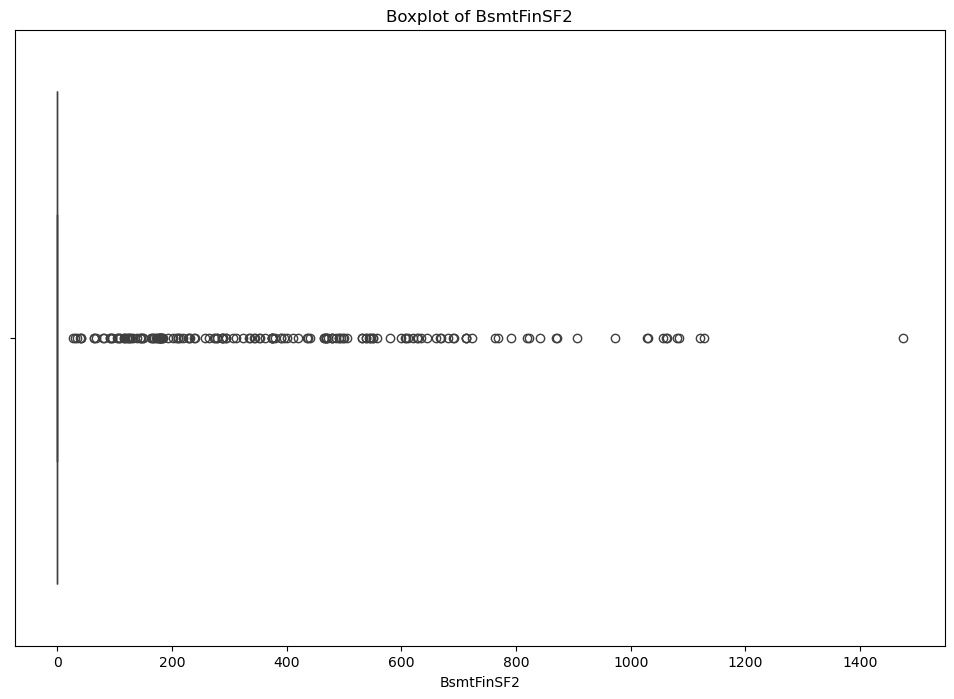

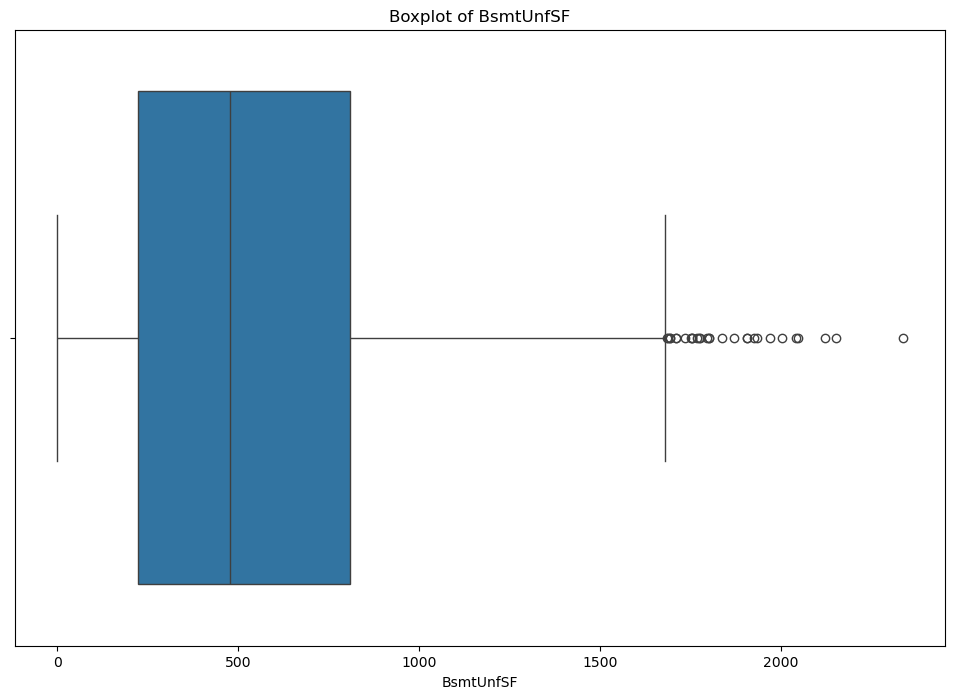

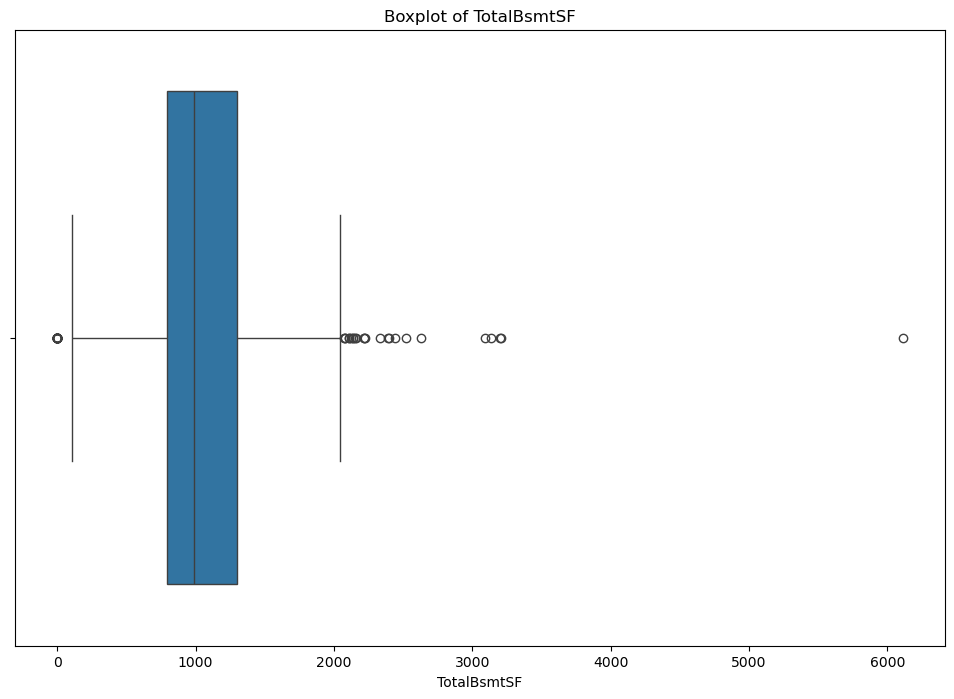

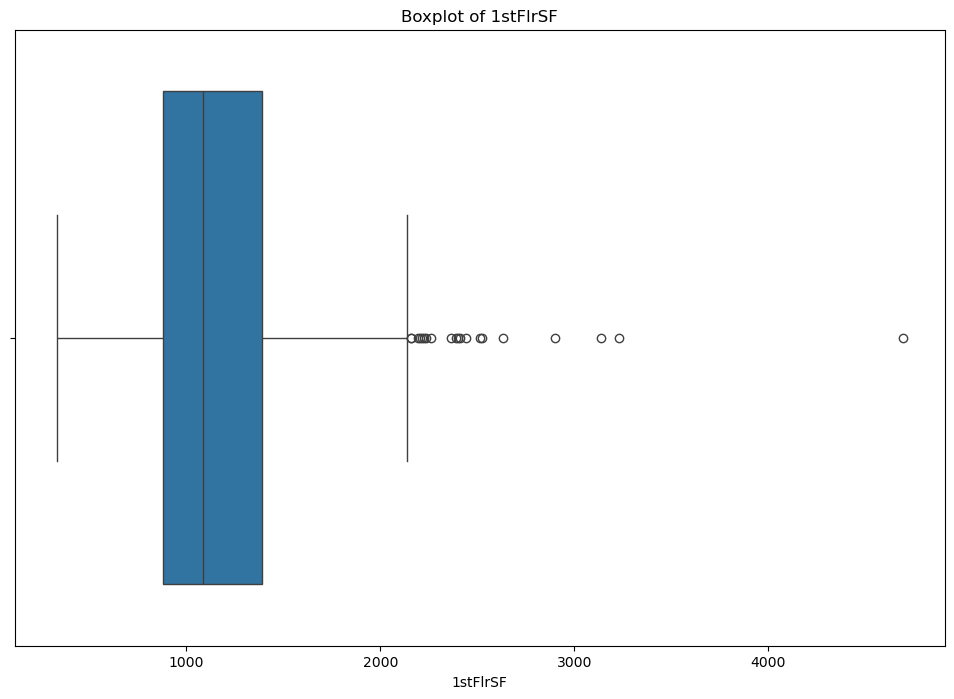

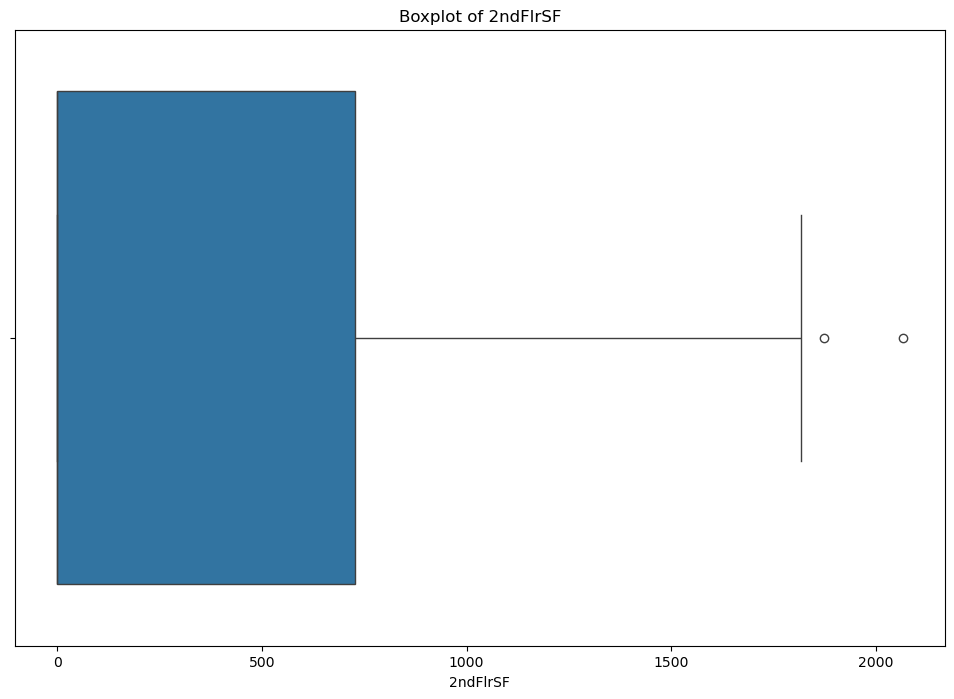

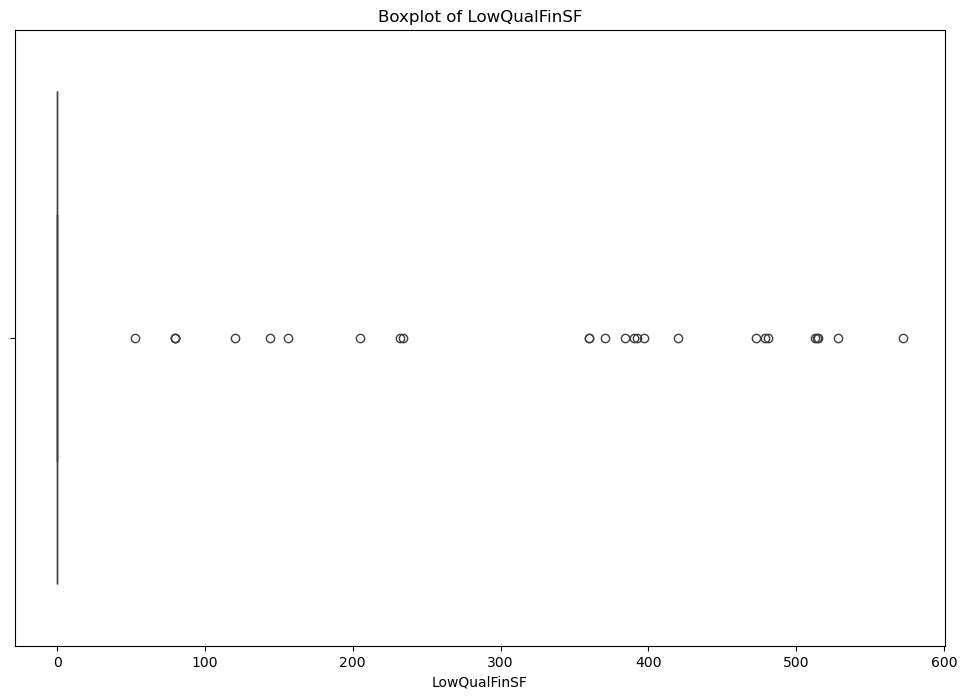

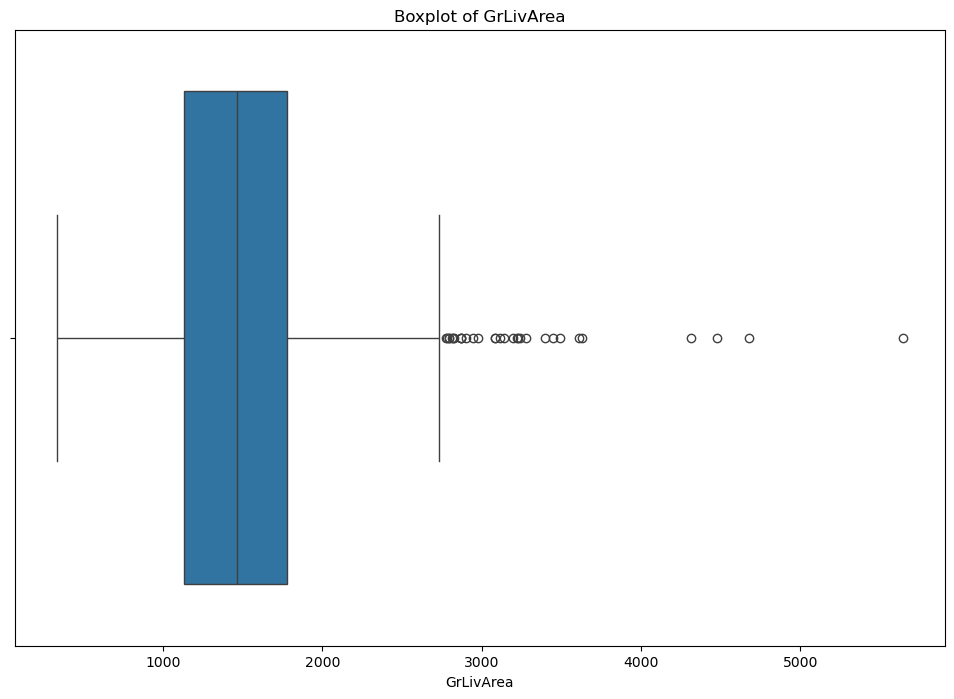

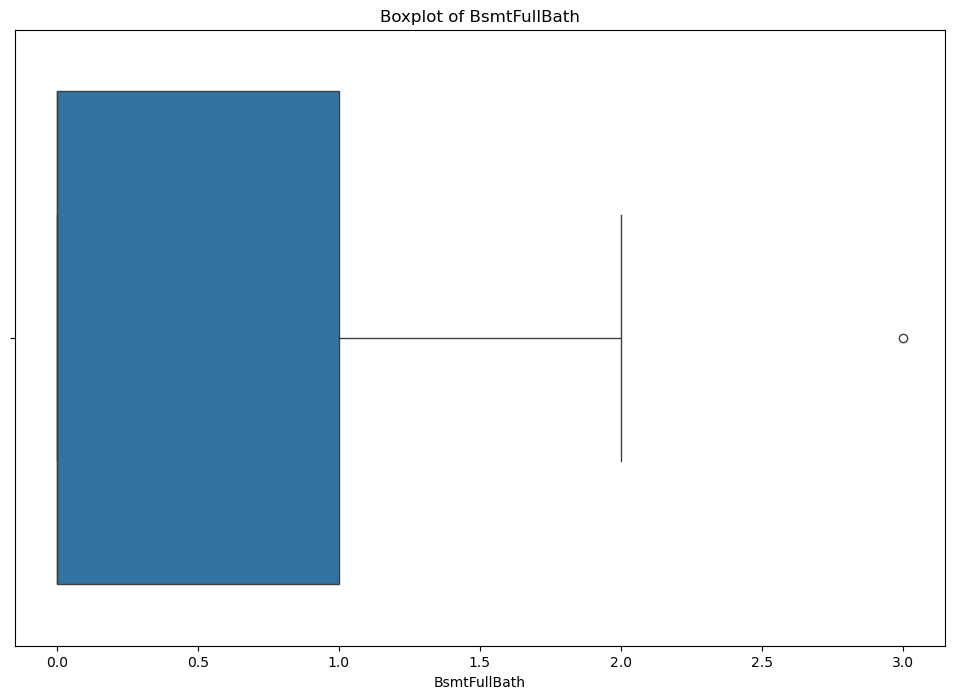

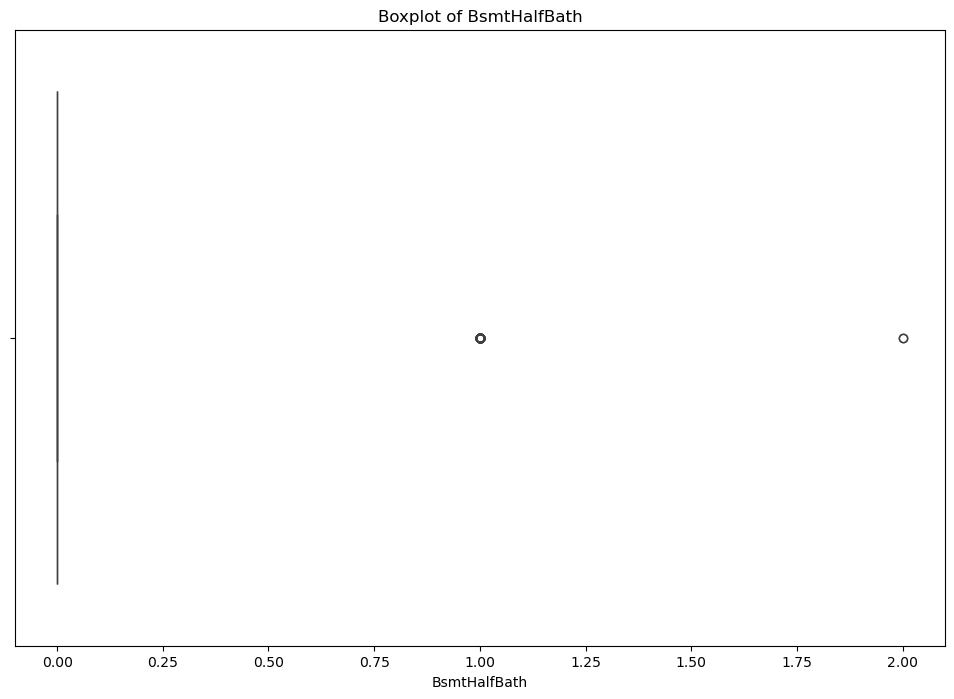

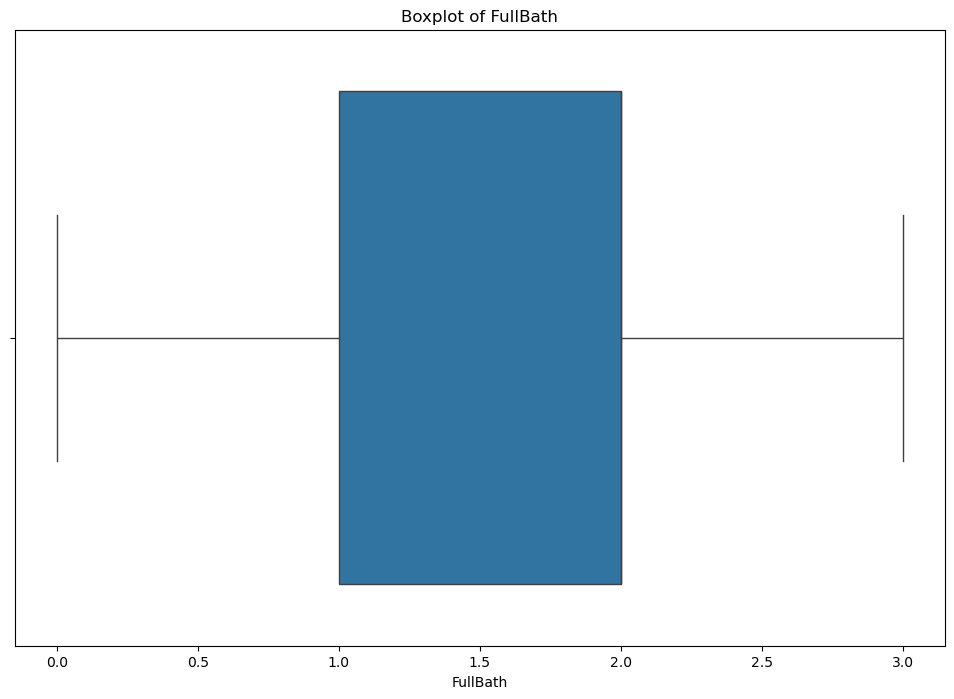

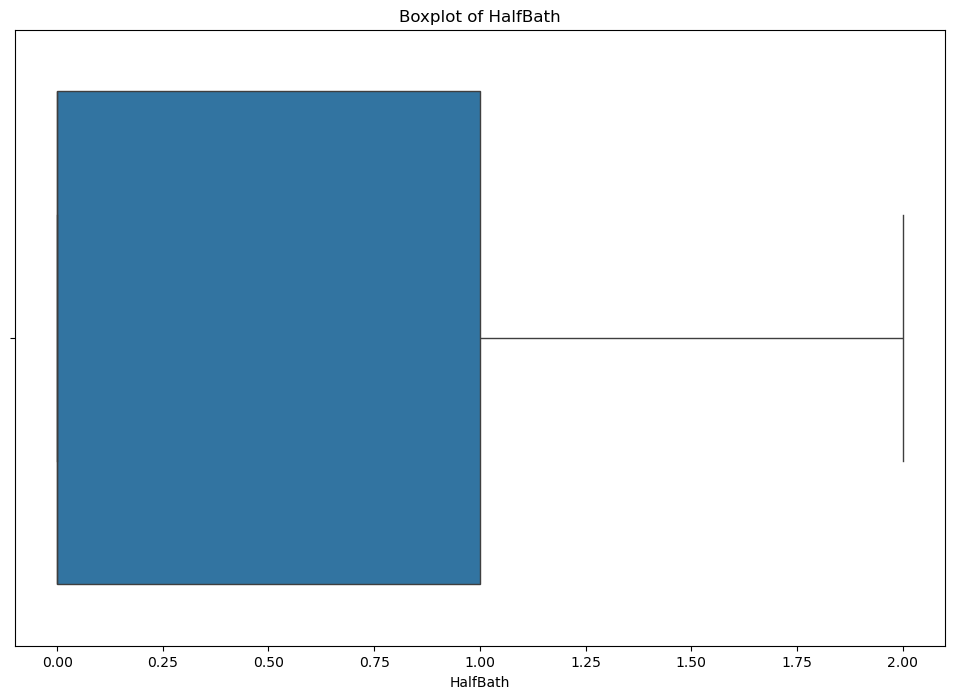

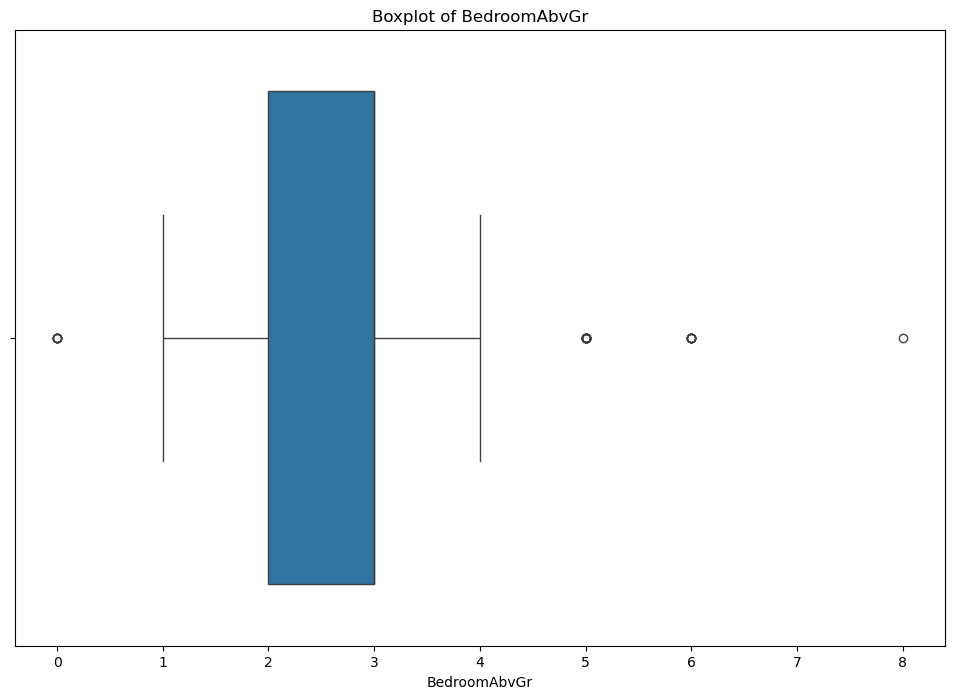

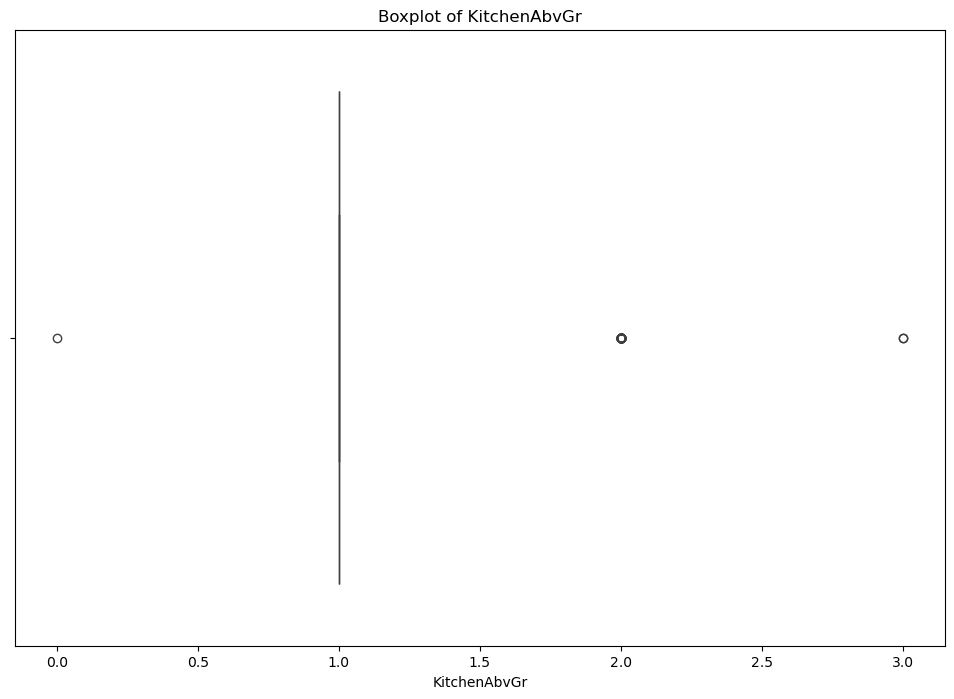

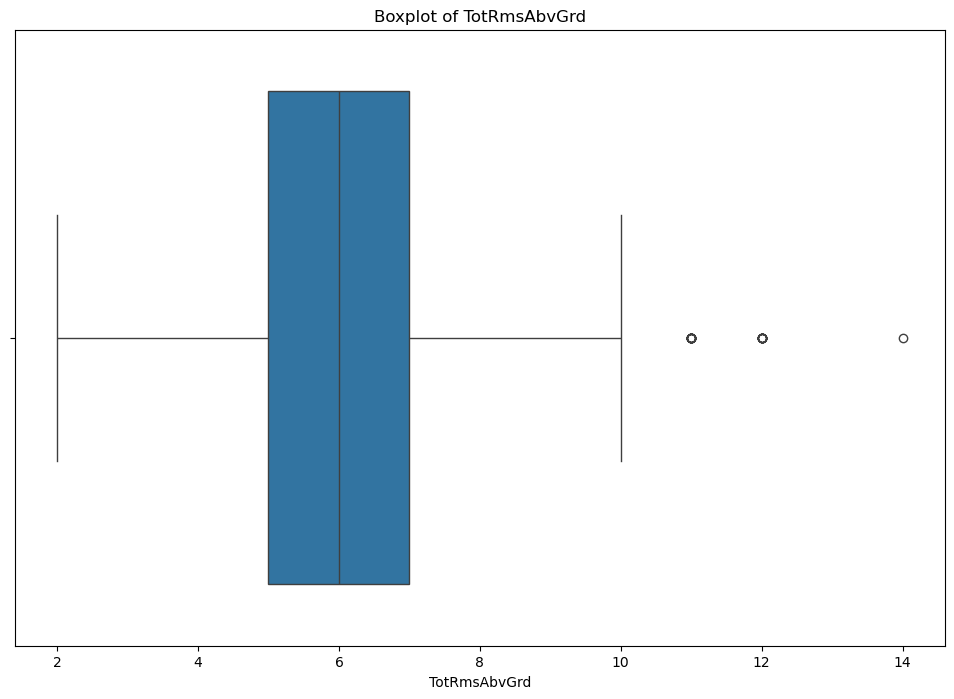

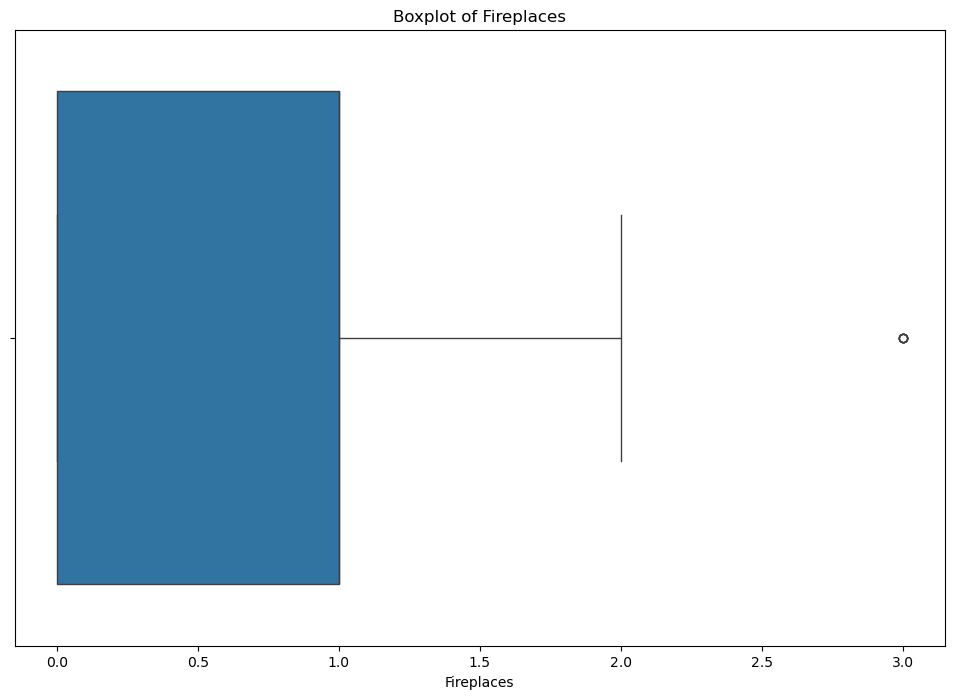

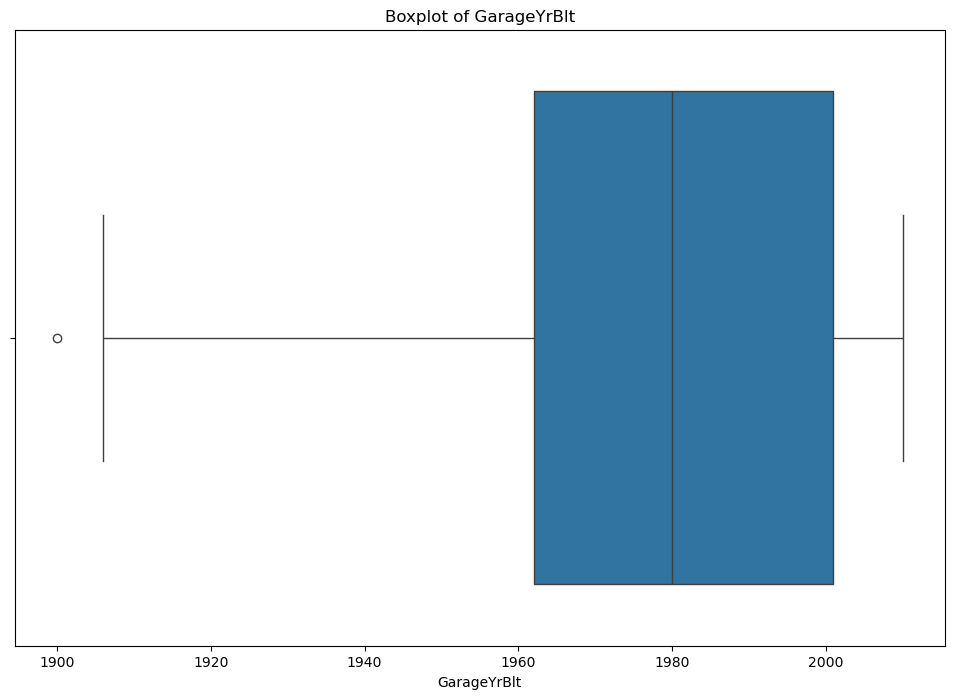

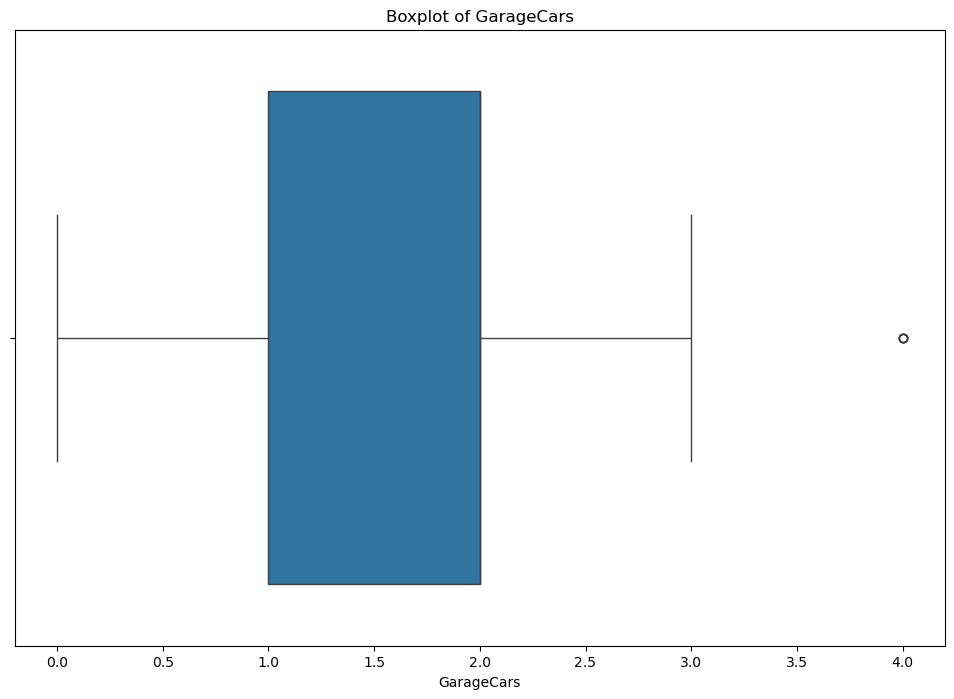

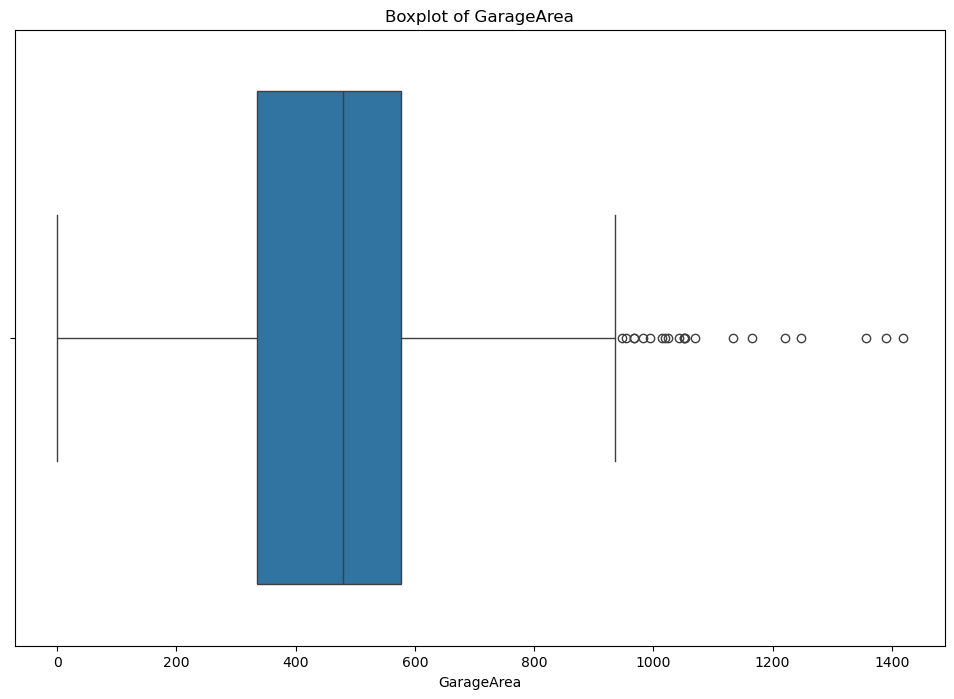

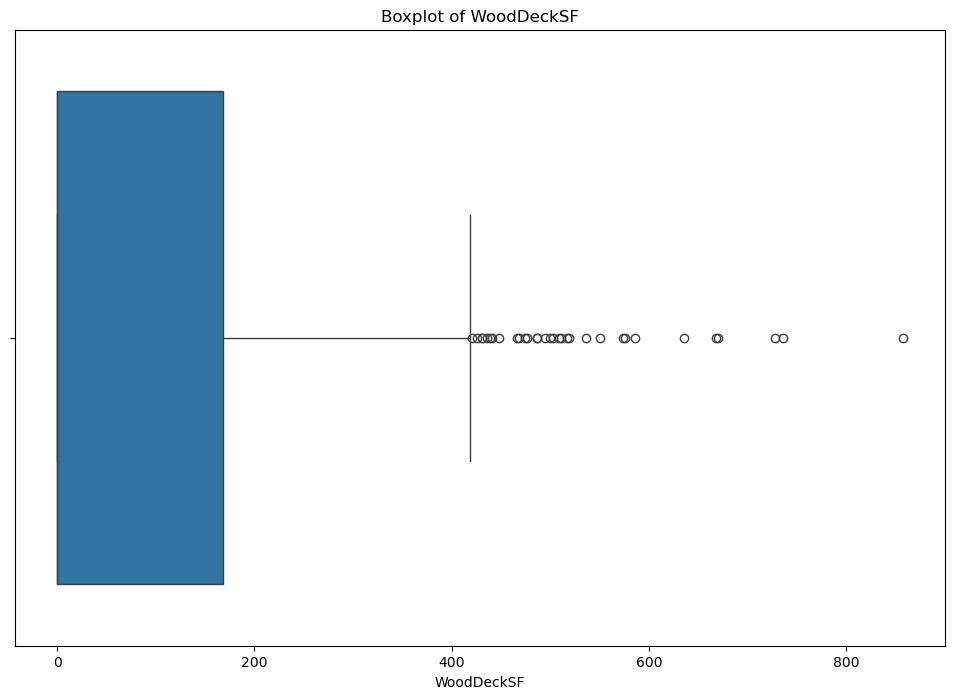

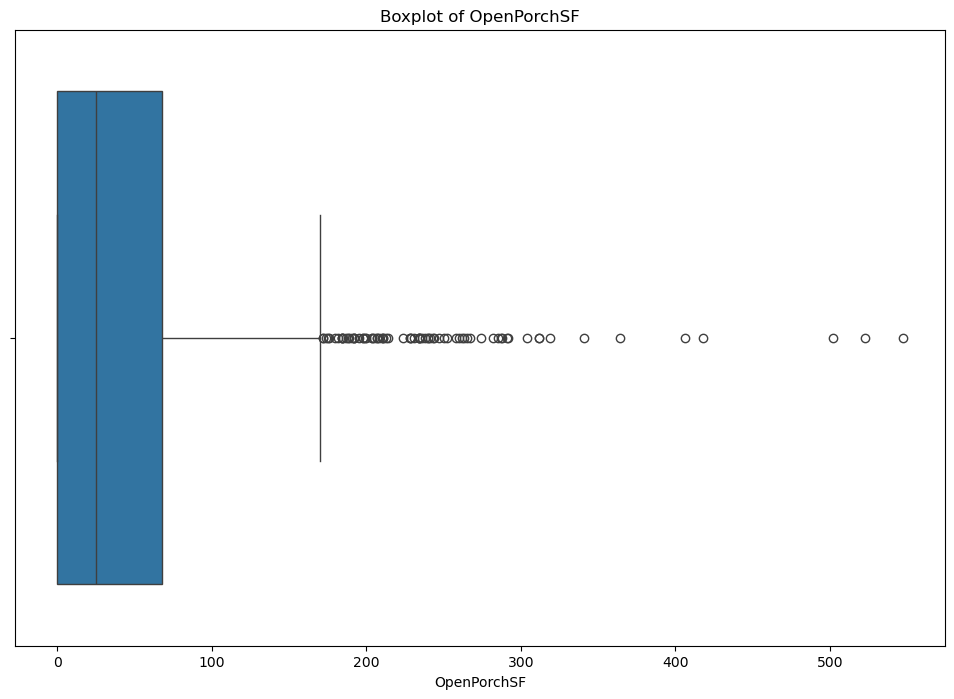

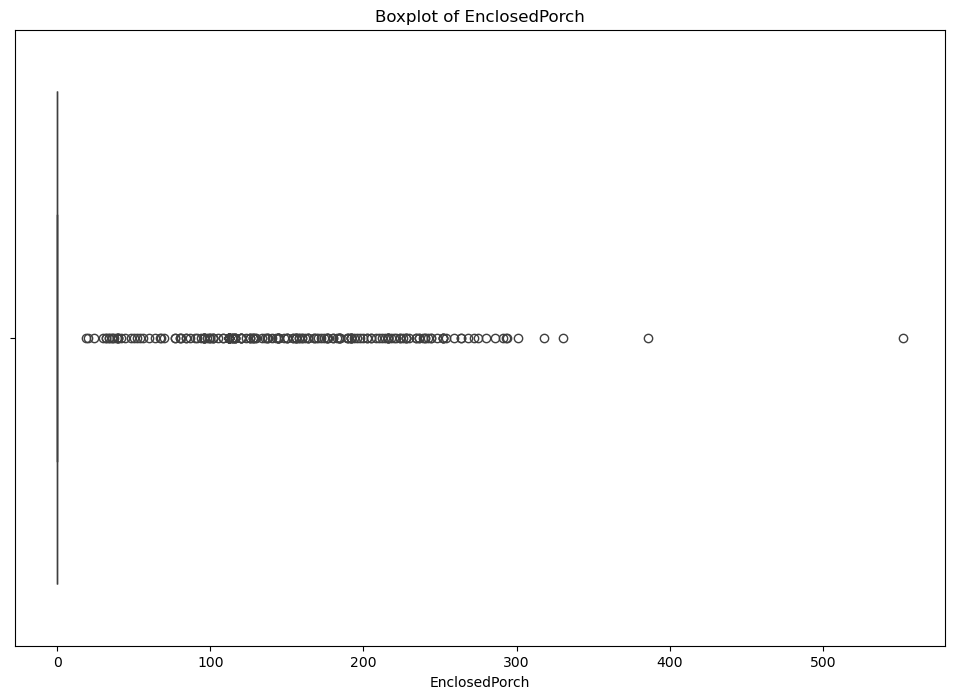

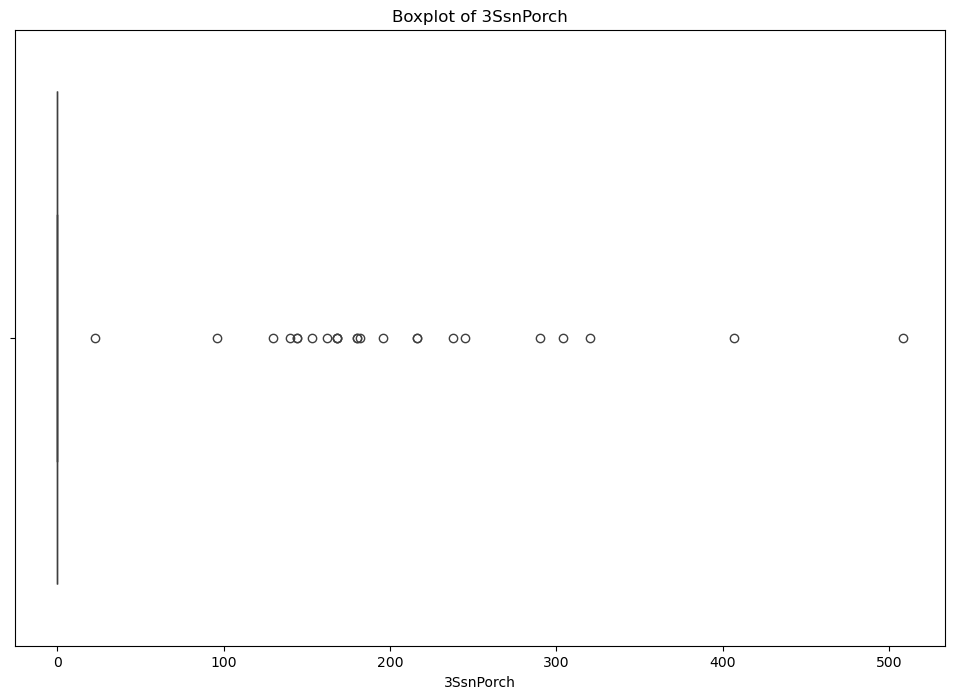

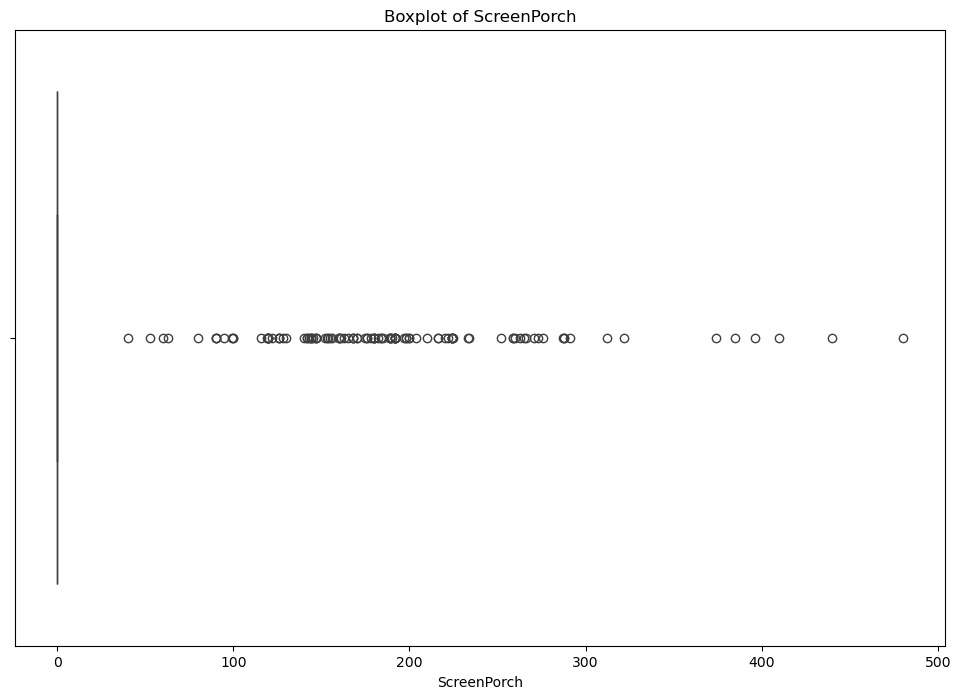

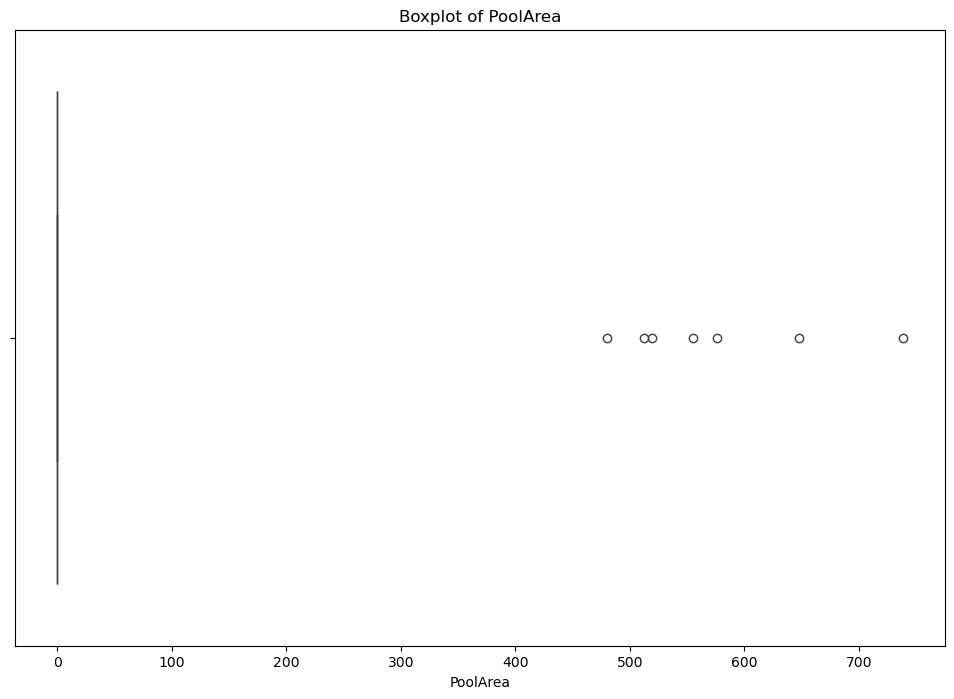

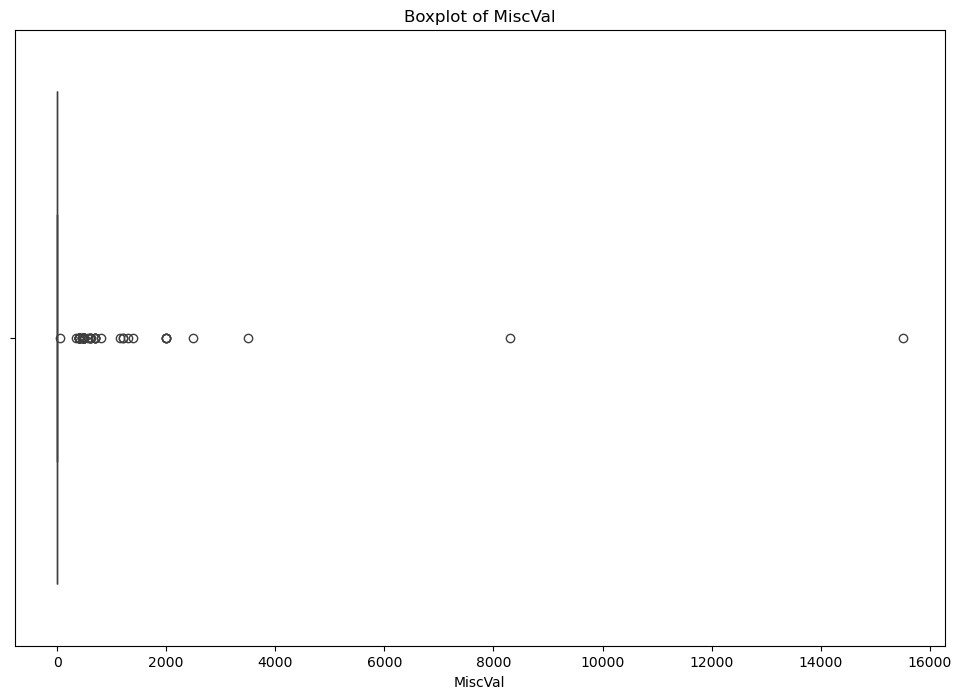

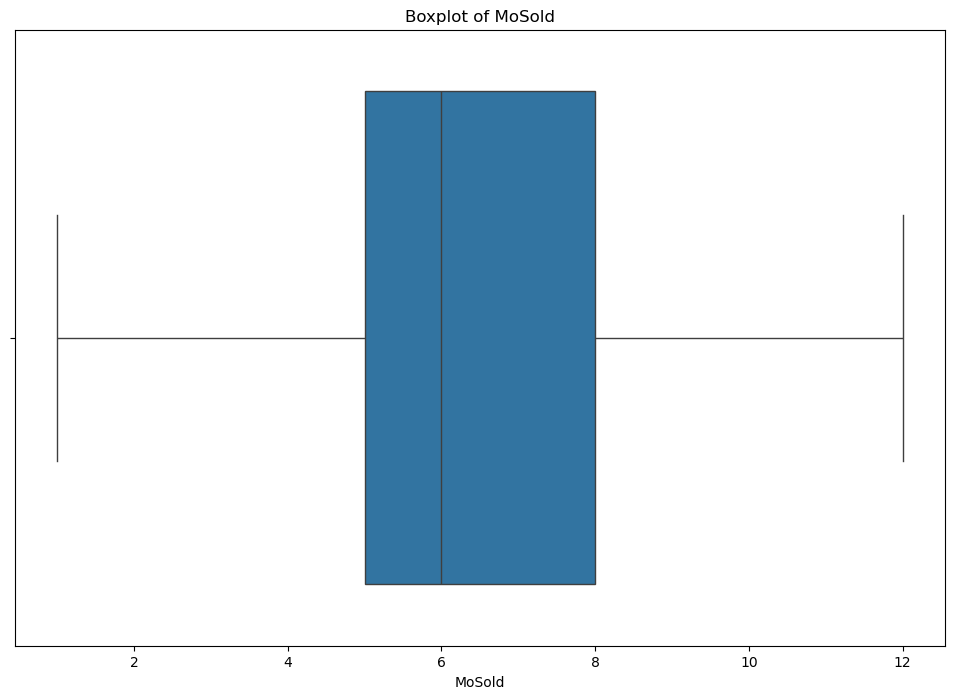

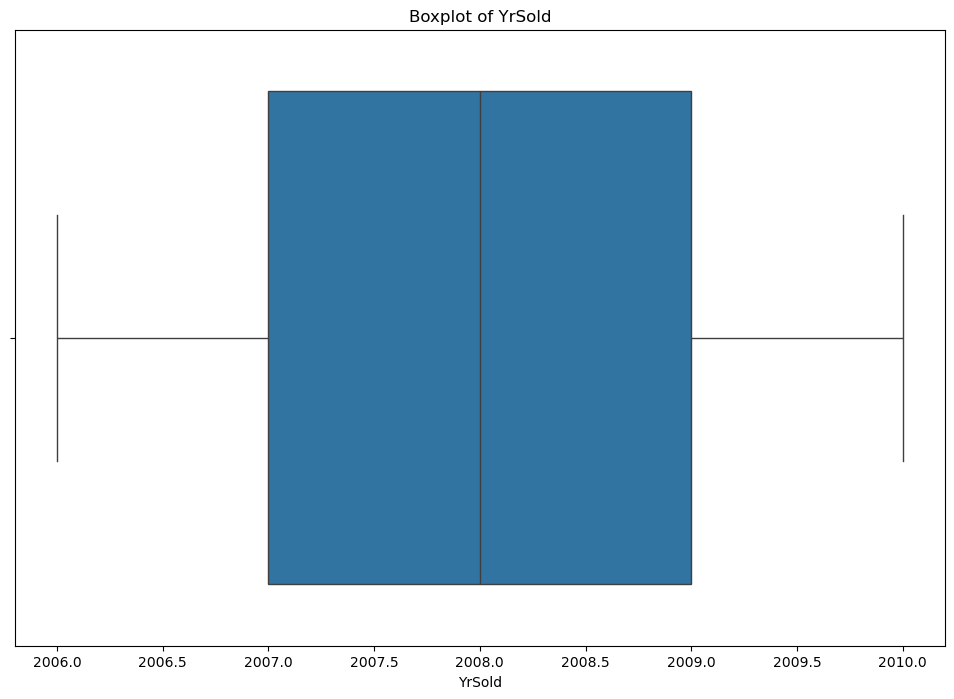

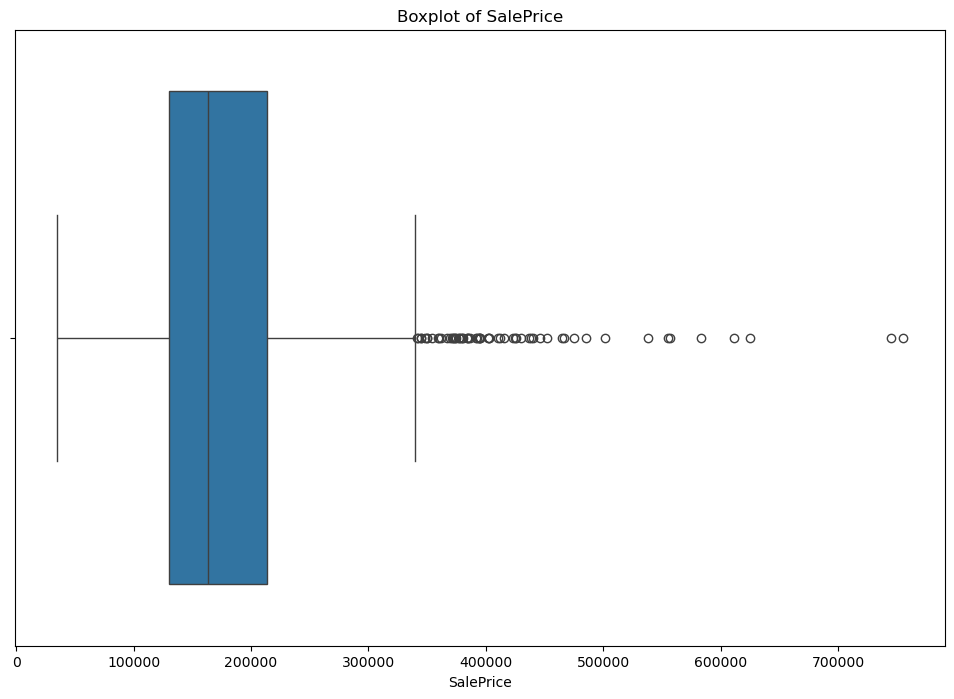

In [28]:
# mengecek apakah masih ada outliers nya
for feature in df_filtered_numeric:
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x=df[feature]
    )
    plt.title(f"Boxplot of {feature}")
    plt.show()